<a href="https://colab.research.google.com/github/svetlanama/goit-np-hw-01/blob/main/NP_HW_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Generate data :

Using np.random.rand() for random generation.
Implement func polynomial(x1, x2) to calculate the target variable y using the specified polynomial.

Статистика згенерованих даних:
Кількість зразків: 100

x1: min=0.006, max=0.987, mean=0.470
x2: min=0.007, max=0.986, mean=0.498
y:  min=3.375, max=15.999, mean=8.418

Перші 5 зразків:
x1		x2		y
----------------------------------------
0.3745		0.0314		4.1544
0.9507		0.6364		12.2669
0.7320		0.3144		7.7769
0.5987		0.5086		8.8377
0.1560		0.9076		10.3704


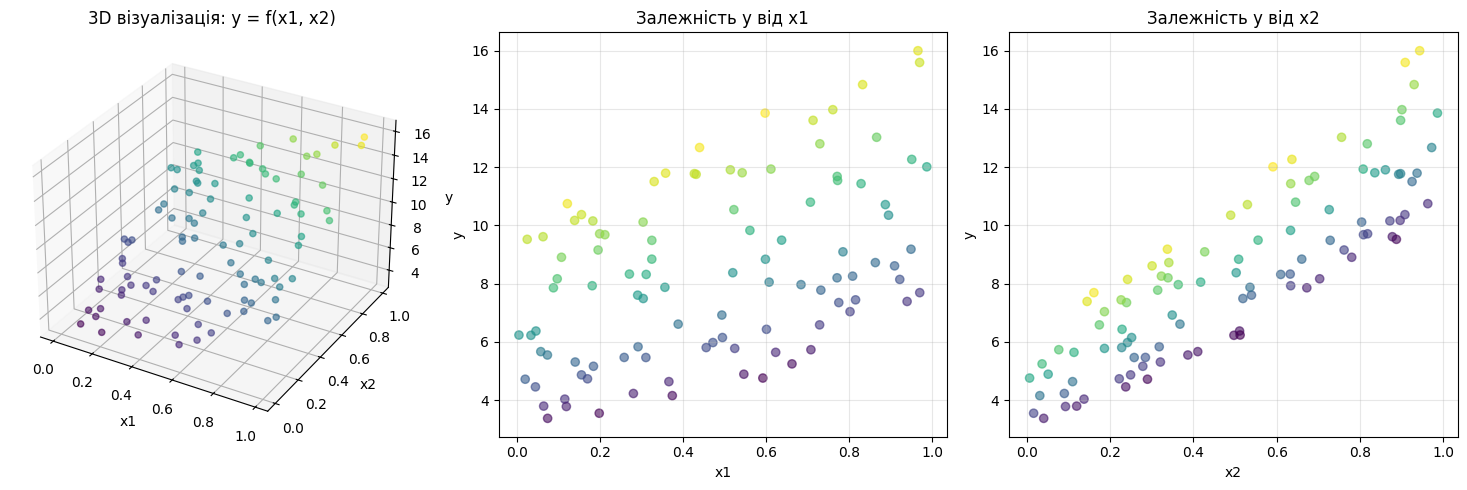

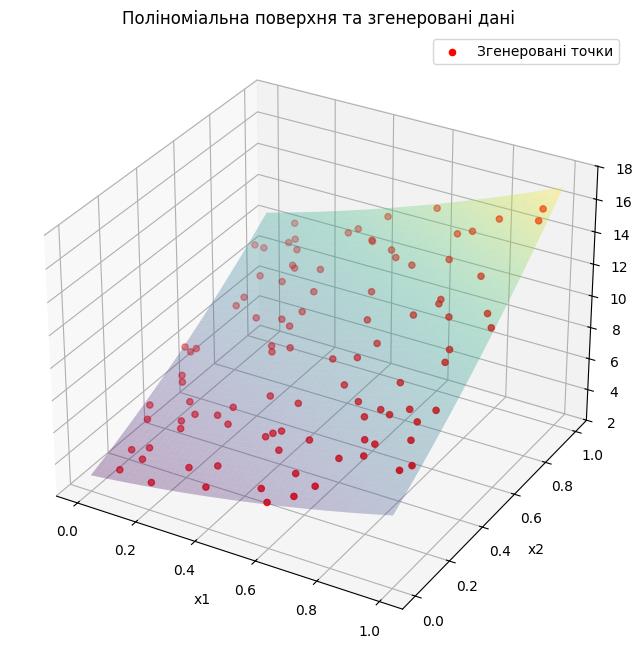

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Встановлюємо seed для відтворюваності результатів
np.random.seed(42)

# 1. Генерація випадкових даних
n_samples = 100

# Генеруємо випадкові значення для x1 та x2 в діапазоні [0, 1)
x1 = np.random.rand(n_samples)
x2 = np.random.rand(n_samples)

# 2. Реалізація поліноміальної функції
def polynomial(x1, x2):
    """
    Обчислює значення поліноміальної функції.

    Приклад поліному: y = 3 + 2*x1 + 5*x2 + 1.5*x1^2 + 2.5*x2^2 + 3*x1*x2

    Параметри:
    ----------
    x1 : array-like
        Перша ознака
    x2 : array-like
        Друга ознака

    Повертає:
    ---------
    y : array-like
        Обчислені значення цільової змінної
    """
    y = 3 + 2*x1 + 5*x2 + 1.5*x1**2 + 2.5*x2**2 + 3*x1*x2
    return y

# Обчислюємо цільову змінну
y = polynomial(x1, x2)

# Виводимо статистику
print("Статистика згенерованих даних:")
print(f"Кількість зразків: {n_samples}")
print(f"\nx1: min={x1.min():.3f}, max={x1.max():.3f}, mean={x1.mean():.3f}")
print(f"x2: min={x2.min():.3f}, max={x2.max():.3f}, mean={x2.mean():.3f}")
print(f"y:  min={y.min():.3f}, max={y.max():.3f}, mean={y.mean():.3f}")

# Виводимо перші 5 значень
print("\nПерші 5 зразків:")
print("x1\t\tx2\t\ty")
print("-" * 40)
for i in range(5):
    print(f"{x1[i]:.4f}\t\t{x2[i]:.4f}\t\t{y[i]:.4f}")

# Візуалізація даних
fig = plt.figure(figsize=(15, 5))

# 3D графік
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(x1, x2, y, c=y, cmap='viridis', alpha=0.6)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('3D візуалізація: y = f(x1, x2)')

# Залежність y від x1
ax2 = fig.add_subplot(132)
ax2.scatter(x1, y, alpha=0.6, c=x2, cmap='viridis')
ax2.set_xlabel('x1')
ax2.set_ylabel('y')
ax2.set_title('Залежність y від x1')
ax2.grid(True, alpha=0.3)

# Залежність y від x2
ax3 = fig.add_subplot(133)
ax3.scatter(x2, y, alpha=0.6, c=x1, cmap='viridis')
ax3.set_xlabel('x2')
ax3.set_ylabel('y')
ax3.set_title('Залежність y від x2')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Додатково: створення поверхні для кращої візуалізації
fig2 = plt.figure(figsize=(10, 8))
ax = fig2.add_subplot(111, projection='3d')

# Створюємо сітку для поверхні
x1_grid = np.linspace(0, 1, 50)
x2_grid = np.linspace(0, 1, 50)
X1_grid, X2_grid = np.meshgrid(x1_grid, x2_grid)
Y_grid = polynomial(X1_grid, X2_grid)

# Малюємо поверхню та точки
ax.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.3, cmap='viridis')
ax.scatter(x1, x2, y, c='red', marker='o', s=20, label='Згенеровані точки')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Поліноміальна поверхня та згенеровані дані')
ax.legend()

plt.show()


2. Generate additional features for each power using the PolynomialFeatures function of the sklearn library.

Оригінальна матриця ознак X:
Розмір: (100, 2)
Перші 5 рядків:
[[0.37454012 0.03142919]
 [0.95071431 0.63641041]
 [0.73199394 0.31435598]
 [0.59865848 0.50857069]
 [0.15601864 0.90756647]]


Степінь полінома: 1

Розмір матриці після трансформації: (100, 3)
Кількість нових ознак: 3

Назви ознак: ['1' 'x1' 'x2']

Перші 5 рядків з новими ознаками:
     1        x1        x2
0  1.0  0.374540  0.031429
1  1.0  0.950714  0.636410
2  1.0  0.731994  0.314356
3  1.0  0.598658  0.508571
4  1.0  0.156019  0.907566

Статистика по ознаках:
           1       x1       x2
count  100.0  100.000  100.000
mean     1.0    0.470    0.498
std      0.0    0.297    0.293
min      1.0    0.006    0.007
25%      1.0    0.193    0.242
50%      1.0    0.464    0.506
75%      1.0    0.730    0.766
max      1.0    0.987    0.986

Степінь полінома: 2

Розмір матриці після трансформації: (100, 6)
Кількість нових ознак: 6

Назви ознак: ['1' 'x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']

Перші 5 рядків з новими ознаками:
     1    

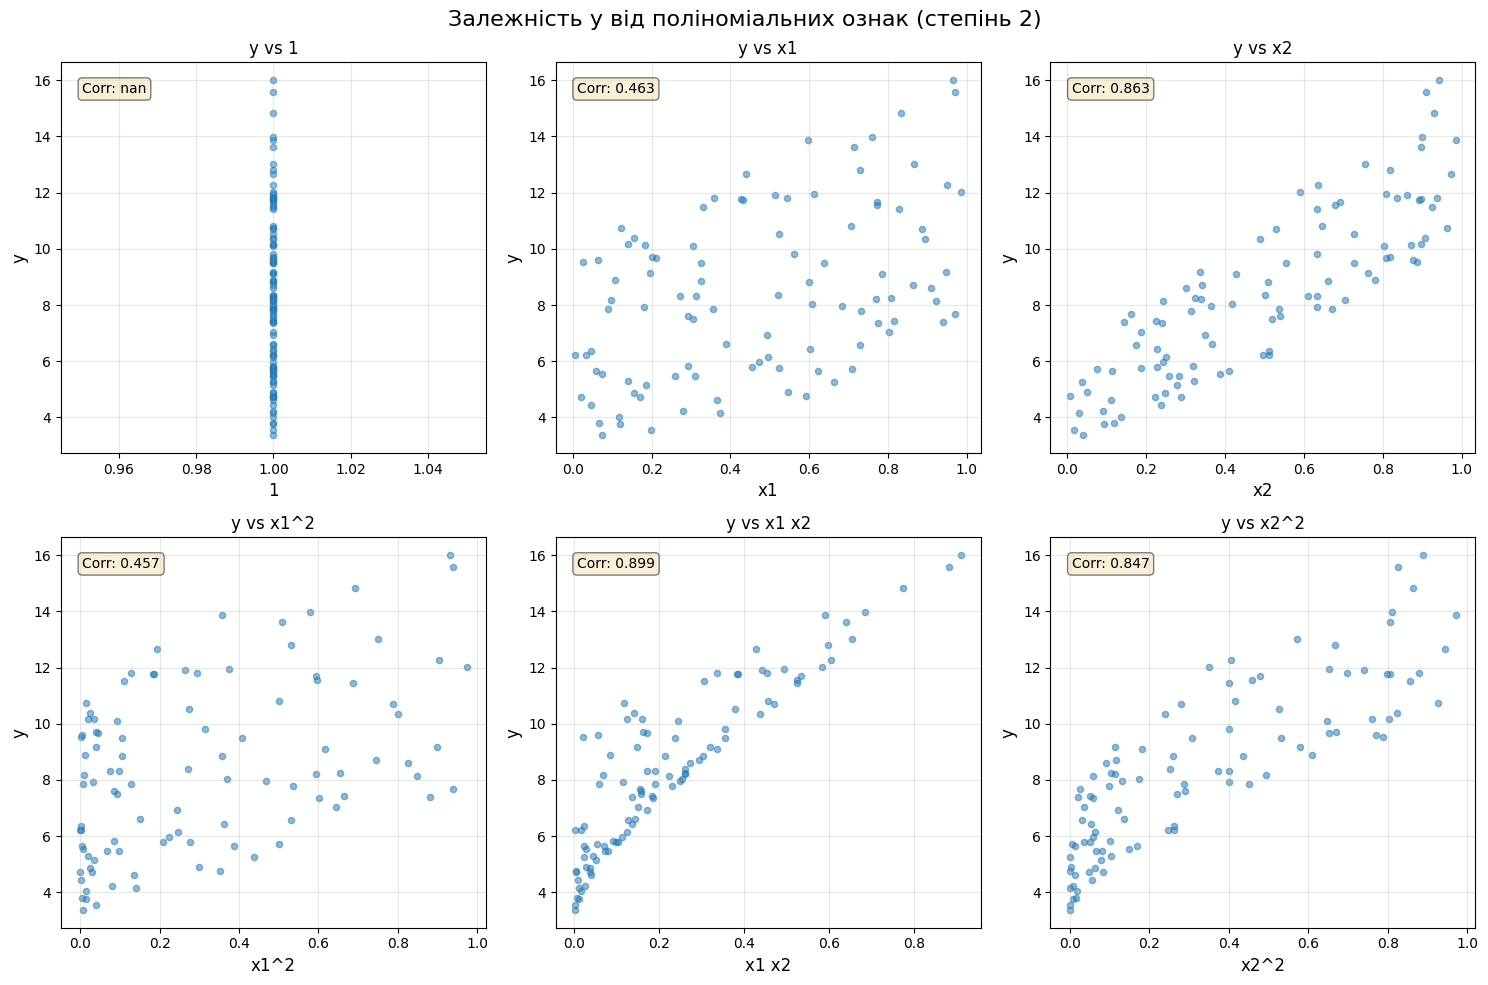



ПОРІВНЯННЯ КІЛЬКОСТІ ОЗНАК
 Степінь  Кількість ознак             Приклад ознак
       1                3              1, x1, x2...
       2                6 1, x1, x2, x1^2, x1 x2...
       3               10 1, x1, x2, x1^2, x1 x2...
       4               15 1, x1, x2, x1^2, x1 x2...
       5               21 1, x1, x2, x1^2, x1 x2...


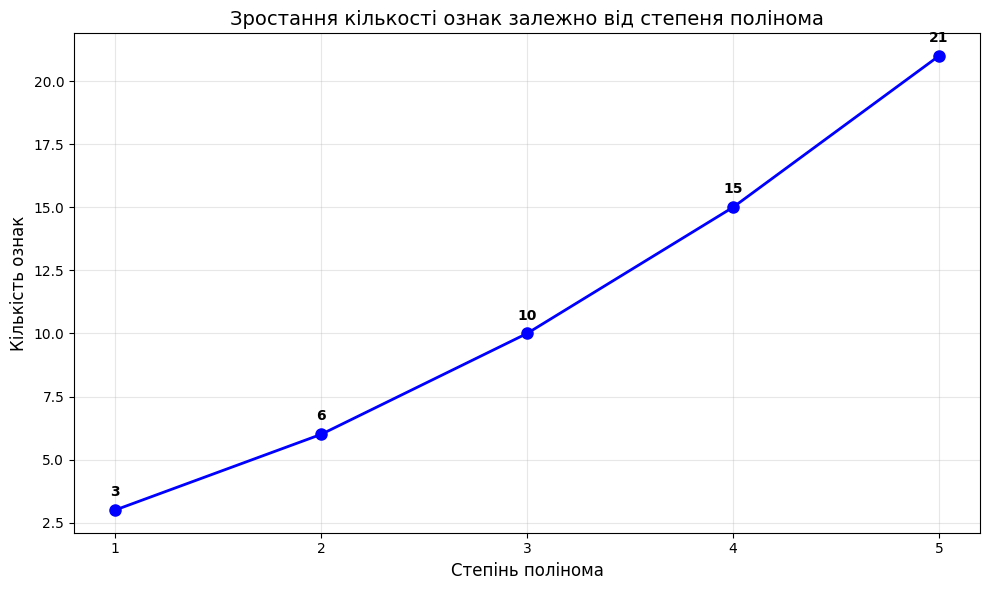


✓ Поліноміальні ознаки успішно згенеровані!


In [3]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Створюємо матрицю ознак X
X = np.column_stack([x1, x2])

print("Оригінальна матриця ознак X:")
print(f"Розмір: {X.shape}")
print(f"Перші 5 рядків:\n{X[:5]}\n")

# Генеруємо поліноміальні ознаки для різних степенів
degrees = [1, 2, 3, 4]

for degree in degrees:
    print(f"\n{'='*60}")
    print(f"Степінь полінома: {degree}")
    print('='*60)

    # Створюємо об'єкт PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)

    # Генеруємо нові ознаки
    X_poly = poly.fit_transform(X)

    # Отримуємо назви ознак
    feature_names = poly.get_feature_names_out(['x1', 'x2'])

    print(f"\nРозмір матриці після трансформації: {X_poly.shape}")
    print(f"Кількість нових ознак: {X_poly.shape[1]}")
    print(f"\nНазви ознак: {feature_names}")

    # Створюємо DataFrame для кращої візуалізації
    df_poly = pd.DataFrame(X_poly, columns=feature_names)

    print(f"\nПерші 5 рядків з новими ознаками:")
    print(df_poly.head())

    # Показуємо статистику по ознаках
    print(f"\nСтатистика по ознаках:")
    print(df_poly.describe().round(3))

# Детальний приклад для степеня 2
print(f"\n\n{'#'*60}")
print("ДЕТАЛЬНИЙ АНАЛІЗ ДЛЯ СТЕПЕНЯ 2")
print('#'*60)

poly2 = PolynomialFeatures(degree=2, include_bias=True)
X_poly2 = poly2.fit_transform(X)
feature_names2 = poly2.get_feature_names_out(['x1', 'x2'])

print(f"\nДля степеня 2 генеруються наступні ознаки:")
for i, name in enumerate(feature_names2):
    print(f"{i+1}. {name}")

# Створюємо DataFrame
df_degree2 = pd.DataFrame(X_poly2, columns=feature_names2)

# Додаємо цільову змінну
df_degree2['y'] = y

print(f"\nПовна таблиця даних (перші 10 рядків):")
print(df_degree2.head(10))

# Візуалізація кореляції ознак
print(f"\nМатриця кореляції з цільовою змінною y:")
correlation = df_degree2.corr()['y'].sort_values(ascending=False)
print(correlation)

# Візуалізація
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Залежність y від поліноміальних ознак (степінь 2)', fontsize=16)

features_to_plot = ['1', 'x1', 'x2', 'x1^2', 'x1 x2', 'x2^2']

for idx, (ax, feature) in enumerate(zip(axes.flat, features_to_plot)):
    ax.scatter(df_degree2[feature], df_degree2['y'], alpha=0.5, s=20)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(f'y vs {feature}')
    ax.grid(True, alpha=0.3)

    # Додаємо коефіцієнт кореляції
    corr = correlation[feature]
    ax.text(0.05, 0.95, f'Corr: {corr:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Порівняння кількості ознак для різних степенів
print(f"\n\n{'='*60}")
print("ПОРІВНЯННЯ КІЛЬКОСТІ ОЗНАК")
print('='*60)

results = []
for degree in range(1, 6):
    poly_temp = PolynomialFeatures(degree=degree, include_bias=True)
    X_temp = poly_temp.fit_transform(X)
    results.append({
        'Степінь': degree,
        'Кількість ознак': X_temp.shape[1],
        'Приклад ознак': ', '.join(poly_temp.get_feature_names_out(['x1', 'x2'])[:5]) + '...'
    })

df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))

# Графік зростання кількості ознак
plt.figure(figsize=(10, 6))
plt.plot(df_results['Степінь'], df_results['Кількість ознак'],
         marker='o', linewidth=2, markersize=8, color='blue')
plt.xlabel('Степінь полінома', fontsize=12)
plt.ylabel('Кількість ознак', fontsize=12)
plt.title('Зростання кількості ознак залежно від степеня полінома', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(df_results['Степінь'])

# Додаємо значення на точках
for i, row in df_results.iterrows():
    plt.annotate(f"{row['Кількість ознак']}",
                xy=(row['Степінь'], row['Кількість ознак']),
                xytext=(0, 10), textcoords='offset points',
                ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Поліноміальні ознаки успішно згенеровані!")

3. Implement functions for gradient descent methods:

Implement the function polynomial_regression_gradient_descent() to calculate polynomial regression coefficients using the gradient descent method.

Implement the function polynomial_regression_SGD() for the SGD variant of the gradient descent method.

Implement the function polynomial_regression_rmsprop() for the RMSProp variant of the gradient descent method.

Implement the function polynomial_regression_adam() for the Adam variant of the gradient descent method.

Implement the function polynomial_regression_nadam() for the Nadam variant of the gradient descent method.

Підготовка даних для порівняння методів...

ПОРІВНЯННЯ МЕТОДІВ ГРАДІЄНТНОГО СПУСКУ

1. Batch Gradient Descent...
   Фінальна втрата: 35.433116

2. Stochastic Gradient Descent...
   Фінальна втрата: 36.095239

3. RMSProp...
   Фінальна втрата: 35.449830

4. Adam...
   Фінальна втрата: 35.432838

5. Nadam...
   Фінальна втрата: 35.432837


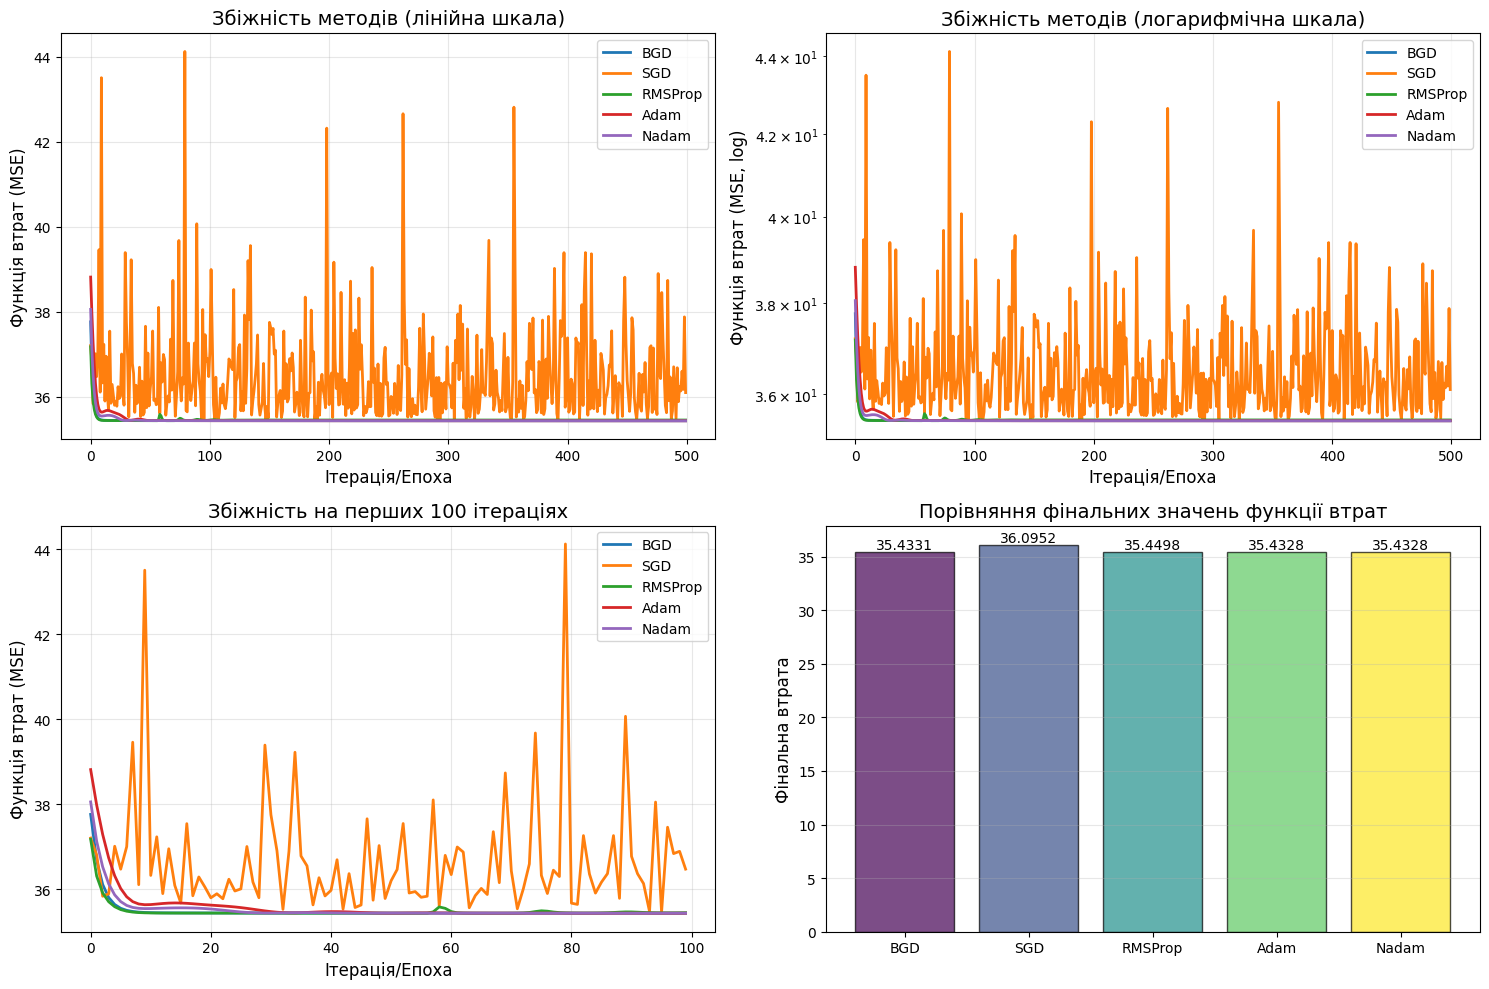


ТАБЛИЦЯ ПОРІВНЯННЯ МЕТОДІВ
  Метод Фінальна втрата  Ітерацій до збіжності  Всього ітерацій
    BGD       35.433116                     13              500
    SGD       36.095239                    500              500
RMSProp       35.449830                     12              500
   Adam       35.432838                     34              500
  Nadam       35.432837                     15              500

✓ Всі методи градієнтного спуску успішно реалізовані та протестовані!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
import pandas as pd

# Допоміжні функції
def compute_cost(X, y, theta):
    """
    Обчислює функцію втрат (MSE).

    Параметри:
    ----------
    X : array, shape (m, n)
        Матриця ознак
    y : array, shape (m,)
        Цільові значення
    theta : array, shape (n,)
        Параметри моделі

    Повертає:
    ---------
    cost : float
        Значення функції втрат
    """
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def compute_gradient(X, y, theta):
    """
    Обчислює градієнт функції втрат.

    Параметри:
    ----------
    X : array, shape (m, n)
        Матриця ознак
    y : array, shape (m,)
        Цільові значення
    theta : array, shape (n,)
        Параметри моделі

    Повертає:
    ---------
    gradient : array, shape (n,)
        Градієнт функції втрат
    """
    m = len(y)
    predictions = X.dot(theta)
    gradient = (1 / m) * X.T.dot(predictions - y)
    return gradient


# 1. Batch Gradient Descent (BGD)
def polynomial_regression_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000,
                                          tolerance=1e-6, verbose=False):
    """
    Batch Gradient Descent для поліноміальної регресії.

    Параметри:
    ----------
    X : array, shape (m, n)
        Матриця ознак
    y : array, shape (m,)
        Цільові значення
    learning_rate : float
        Швидкість навчання
    n_iterations : int
        Максимальна кількість ітерацій
    tolerance : float
        Поріг зупинки (зміна функції втрат)
    verbose : bool
        Виводити інформацію про процес навчання

    Повертає:
    ---------
    theta : array
        Оптимальні параметри моделі
    cost_history : list
        Історія значень функції втрат
    """
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for iteration in range(n_iterations):
        # Обчислюємо градієнт
        gradient = compute_gradient(X, y, theta)

        # Оновлюємо параметри
        theta = theta - learning_rate * gradient

        # Обчислюємо функцію втрат
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Перевірка на збіжність
        if iteration > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
            if verbose:
                print(f"Збіжність досягнута на ітерації {iteration}")
            break

        if verbose and iteration % 100 == 0:
            print(f"Ітерація {iteration}: Cost = {cost:.6f}")

    return theta, cost_history


# 2. Stochastic Gradient Descent (SGD)
def polynomial_regression_SGD(X, y, learning_rate=0.01, n_epochs=100,
                             batch_size=1, shuffle=True, verbose=False):
    """
    Stochastic Gradient Descent для поліноміальної регресії.

    Параметри:
    ----------
    X : array, shape (m, n)
        Матриця ознак
    y : array, shape (m,)
        Цільові значення
    learning_rate : float
        Швидкість навчання
    n_epochs : int
        Кількість епох
    batch_size : int
        Розмір батчу (1 для справжнього SGD)
    shuffle : bool
        Перемішувати дані на кожній епосі
    verbose : bool
        Виводити інформацію про процес навчання

    Повертає:
    ---------
    theta : array
        Оптимальні параметри моделі
    cost_history : list
        Історія значень функції втрат
    """
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for epoch in range(n_epochs):
        # Перемішуємо дані
        if shuffle:
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
        else:
            X_shuffled = X
            y_shuffled = y

        # Проходимо по батчам
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Обчислюємо градієнт для батчу
            gradient = compute_gradient(X_batch, y_batch, theta)

            # Оновлюємо параметри
            theta = theta - learning_rate * gradient

        # Обчислюємо функцію втрат на всіх даних
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if verbose and epoch % 10 == 0:
            print(f"Епоха {epoch}: Cost = {cost:.6f}")

    return theta, cost_history


# 3. RMSProp
def polynomial_regression_rmsprop(X, y, learning_rate=0.01, n_iterations=1000,
                                 beta=0.9, epsilon=1e-8, verbose=False):
    """
    RMSProp для поліноміальної регресії.

    Параметри:
    ----------
    X : array, shape (m, n)
        Матриця ознак
    y : array, shape (m,)
        Цільові значення
    learning_rate : float
        Швидкість навчання
    n_iterations : int
        Кількість ітерацій
    beta : float
        Коефіцієнт експоненційного згладжування (зазвичай 0.9)
    epsilon : float
        Мале число для стабільності обчислень
    verbose : bool
        Виводити інформацію про процес навчання

    Повертає:
    ---------
    theta : array
        Оптимальні параметри моделі
    cost_history : list
        Історія значень функції втрат
    """
    m, n = X.shape
    theta = np.zeros(n)
    squared_gradients = np.zeros(n)  # Накопичувач квадратів градієнтів
    cost_history = []

    for iteration in range(n_iterations):
        # Обчислюємо градієнт
        gradient = compute_gradient(X, y, theta)

        # Оновлюємо накопичувач квадратів градієнтів
        squared_gradients = beta * squared_gradients + (1 - beta) * gradient ** 2

        # Оновлюємо параметри з адаптивною швидкістю навчання
        theta = theta - learning_rate * gradient / (np.sqrt(squared_gradients) + epsilon)

        # Обчислюємо функцію втрат
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if verbose and iteration % 100 == 0:
            print(f"Ітерація {iteration}: Cost = {cost:.6f}")

    return theta, cost_history


# 4. Adam (Adaptive Moment Estimation)
def polynomial_regression_adam(X, y, learning_rate=0.01, n_iterations=1000,
                              beta1=0.9, beta2=0.999, epsilon=1e-8, verbose=False):
    """
    Adam optimizer для поліноміальної регресії.

    Параметри:
    ----------
    X : array, shape (m, n)
        Матриця ознак
    y : array, shape (m,)
        Цільові значення
    learning_rate : float
        Швидкість навчання
    n_iterations : int
        Кількість ітерацій
    beta1 : float
        Коефіцієнт експоненційного згладжування для першого моменту (зазвичай 0.9)
    beta2 : float
        Коефіцієнт експоненційного згладжування для другого моменту (зазвичай 0.999)
    epsilon : float
        Мале число для стабільності обчислень
    verbose : bool
        Виводити інформацію про процес навчання

    Повертає:
    ---------
    theta : array
        Оптимальні параметри моделі
    cost_history : list
        Історія значень функції втрат
    """
    m, n = X.shape
    theta = np.zeros(n)
    m_t = np.zeros(n)  # Перший момент (середнє градієнтів)
    v_t = np.zeros(n)  # Другий момент (середнє квадратів градієнтів)
    cost_history = []

    for iteration in range(1, n_iterations + 1):
        # Обчислюємо градієнт
        gradient = compute_gradient(X, y, theta)

        # Оновлюємо перший момент (momentum)
        m_t = beta1 * m_t + (1 - beta1) * gradient

        # Оновлюємо другий момент (RMSProp)
        v_t = beta2 * v_t + (1 - beta2) * gradient ** 2

        # Корекція зміщення (bias correction)
        m_t_hat = m_t / (1 - beta1 ** iteration)
        v_t_hat = v_t / (1 - beta2 ** iteration)

        # Оновлюємо параметри
        theta = theta - learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

        # Обчислюємо функцію втрат
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if verbose and iteration % 100 == 0:
            print(f"Ітерація {iteration}: Cost = {cost:.6f}")

    return theta, cost_history


# 5. Nadam (Nesterov-accelerated Adam)
def polynomial_regression_nadam(X, y, learning_rate=0.01, n_iterations=1000,
                               beta1=0.9, beta2=0.999, epsilon=1e-8, verbose=False):
    """
    Nadam optimizer для поліноміальної регресії.
    Nadam = Nesterov momentum + Adam

    Параметри:
    ----------
    X : array, shape (m, n)
        Матриця ознак
    y : array, shape (m,)
        Цільові значення
    learning_rate : float
        Швидкість навчання
    n_iterations : int
        Кількість ітерацій
    beta1 : float
        Коефіцієнт експоненційного згладжування для першого моменту
    beta2 : float
        Коефіцієнт експоненційного згладжування для другого моменту
    epsilon : float
        Мале число для стабільності обчислень
    verbose : bool
        Виводити інформацію про процес навчання

    Повертає:
    ---------
    theta : array
        Оптимальні параметри моделі
    cost_history : list
        Історія значень функції втрат
    """
    m, n = X.shape
    theta = np.zeros(n)
    m_t = np.zeros(n)  # Перший момент
    v_t = np.zeros(n)  # Другий момент
    cost_history = []

    for iteration in range(1, n_iterations + 1):
        # Обчислюємо градієнт
        gradient = compute_gradient(X, y, theta)

        # Оновлюємо перший момент
        m_t = beta1 * m_t + (1 - beta1) * gradient

        # Оновлюємо другий момент
        v_t = beta2 * v_t + (1 - beta2) * gradient ** 2

        # Корекція зміщення
        m_t_hat = m_t / (1 - beta1 ** iteration)
        v_t_hat = v_t / (1 - beta2 ** iteration)

        # Nesterov momentum: використовуємо "заглядання вперед"
        m_t_bar = beta1 * m_t_hat + (1 - beta1) * gradient / (1 - beta1 ** iteration)

        # Оновлюємо параметри з Nesterov momentum
        theta = theta - learning_rate * m_t_bar / (np.sqrt(v_t_hat) + epsilon)

        # Обчислюємо функцію втрат
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if verbose and iteration % 100 == 0:
            print(f"Ітерація {iteration}: Cost = {cost:.6f}")

    return theta, cost_history


# Функція для порівняння всіх методів
def compare_optimizers(X, y, learning_rate=0.01, n_iterations=1000):
    """
    Порівнює всі методи оптимізації.
    """
    print("="*70)
    print("ПОРІВНЯННЯ МЕТОДІВ ГРАДІЄНТНОГО СПУСКУ")
    print("="*70)

    results = {}

    # 1. Batch Gradient Descent
    print("\n1. Batch Gradient Descent...")
    theta_bgd, cost_bgd = polynomial_regression_gradient_descent(
        X, y, learning_rate=learning_rate, n_iterations=n_iterations, verbose=False
    )
    results['BGD'] = {'theta': theta_bgd, 'cost_history': cost_bgd}
    print(f"   Фінальна втрата: {cost_bgd[-1]:.6f}")

    # 2. SGD
    print("\n2. Stochastic Gradient Descent...")
    theta_sgd, cost_sgd = polynomial_regression_SGD(
        X, y, learning_rate=learning_rate, n_epochs=n_iterations,
        batch_size=32, verbose=False
    )
    results['SGD'] = {'theta': theta_sgd, 'cost_history': cost_sgd}
    print(f"   Фінальна втрата: {cost_sgd[-1]:.6f}")

    # 3. RMSProp
    print("\n3. RMSProp...")
    theta_rmsprop, cost_rmsprop = polynomial_regression_rmsprop(
        X, y, learning_rate=learning_rate, n_iterations=n_iterations, verbose=False
    )
    results['RMSProp'] = {'theta': theta_rmsprop, 'cost_history': cost_rmsprop}
    print(f"   Фінальна втрата: {cost_rmsprop[-1]:.6f}")

    # 4. Adam
    print("\n4. Adam...")
    theta_adam, cost_adam = polynomial_regression_adam(
        X, y, learning_rate=learning_rate, n_iterations=n_iterations, verbose=False
    )
    results['Adam'] = {'theta': theta_adam, 'cost_history': cost_adam}
    print(f"   Фінальна втрата: {cost_adam[-1]:.6f}")

    # 5. Nadam
    print("\n5. Nadam...")
    theta_nadam, cost_nadam = polynomial_regression_nadam(
        X, y, learning_rate=learning_rate, n_iterations=n_iterations, verbose=False
    )
    results['Nadam'] = {'theta': theta_nadam, 'cost_history': cost_nadam}
    print(f"   Фінальна втрата: {cost_nadam[-1]:.6f}")

    return results


# Візуалізація результатів
def visualize_convergence(results):
    """
    Візуалізує збіжність всіх методів.
    """
    plt.figure(figsize=(15, 10))

    # Графік 1: Збіжність (лінійна шкала)
    plt.subplot(2, 2, 1)
    for name, data in results.items():
        plt.plot(data['cost_history'], label=name, linewidth=2)
    plt.xlabel('Ітерація/Епоха', fontsize=12)
    plt.ylabel('Функція втрат (MSE)', fontsize=12)
    plt.title('Збіжність методів (лінійна шкала)', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Графік 2: Збіжність (логарифмічна шкала)
    plt.subplot(2, 2, 2)
    for name, data in results.items():
        plt.semilogy(data['cost_history'], label=name, linewidth=2)
    plt.xlabel('Ітерація/Епоха', fontsize=12)
    plt.ylabel('Функція втрат (MSE, log)', fontsize=12)
    plt.title('Збіжність методів (логарифмічна шкала)', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Графік 3: Перші 100 ітерацій
    plt.subplot(2, 2, 3)
    for name, data in results.items():
        history = data['cost_history'][:100]
        plt.plot(history, label=name, linewidth=2)
    plt.xlabel('Ітерація/Епоха', fontsize=12)
    plt.ylabel('Функція втрат (MSE)', fontsize=12)
    plt.title('Збіжність на перших 100 ітераціях', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Графік 4: Порівняння фінальних значень
    plt.subplot(2, 2, 4)
    names = list(results.keys())
    final_costs = [results[name]['cost_history'][-1] for name in names]
    colors = plt.cm.viridis(np.linspace(0, 1, len(names)))
    bars = plt.bar(names, final_costs, color=colors, alpha=0.7, edgecolor='black')
    plt.ylabel('Фінальна втрата', fontsize=12)
    plt.title('Порівняння фінальних значень функції втрат', fontsize=14)
    plt.grid(True, alpha=0.3, axis='y')

    # Додаємо значення на стовпці
    for bar, cost in zip(bars, final_costs):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{cost:.4f}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()


# Таблиця порівняння
def create_comparison_table(results):
    """
    Створює таблицю порівняння методів.
    """
    comparison_data = []

    for name, data in results.items():
        final_cost = data['cost_history'][-1]
        n_iterations = len(data['cost_history'])

        # Визначаємо кількість ітерацій до збіжності (зміна < 0.001)
        converged_at = n_iterations
        for i in range(1, len(data['cost_history'])):
            if abs(data['cost_history'][i] - data['cost_history'][i-1]) < 0.001:
                converged_at = i
                break

        comparison_data.append({
            'Метод': name,
            'Фінальна втрата': f"{final_cost:.6f}",
            'Ітерацій до збіжності': converged_at,
            'Всього ітерацій': n_iterations
        })

    df = pd.DataFrame(comparison_data)
    print("\n" + "="*70)
    print("ТАБЛИЦЯ ПОРІВНЯННЯ МЕТОДІВ")
    print("="*70)
    print(df.to_string(index=False))
    print("="*70)

    return df


# Тестування на згенерованих даних
print("Підготовка даних для порівняння методів...\n")

# Використовуємо поліноміальні ознаки степеня 2
poly2 = PolynomialFeatures(degree=2, include_bias=True)
X_poly2 = poly2.fit_transform(X)

# Нормалізація ознак (важливо для градієнтного спуску)
X_mean = X_poly2.mean(axis=0)
X_std = X_poly2.std(axis=0)
X_std[X_std == 0] = 1  # Уникаємо ділення на 0
X_normalized = (X_poly2 - X_mean) / X_std

# Порівнюємо всі методи
results = compare_optimizers(X_normalized, y, learning_rate=0.1, n_iterations=500)

# Візуалізуємо результати
visualize_convergence(results)

# Створюємо таблицю порівняння
comparison_df = create_comparison_table(results)

print("\n✓ Всі методи градієнтного спуску успішно реалізовані та протестовані!")

4. Calculate the running time of implemented functions using the %timeit function.

ПІДГОТОВКА ДАНИХ ДЛЯ ВИМІРЮВАННЯ ЧАСУ

Розміри наборів даних: [100, 500, 1000]
Степені полінома: [2, 3, 4]

ВИМІРЮВАННЯ ЧАСУ ВИКОНАННЯ

Розмір даних: 100 зразків

  Степінь полінома: 2
  ------------------------------------------------------------------
  Кількість ознак: 6

  1. Batch Gradient Descent...
     Час: 24.69 ± 9.74 ms
  2. Stochastic Gradient Descent...
     Час: 121.22 ± 76.85 ms
  3. RMSProp...
     Час: 67.47 ± 20.27 ms
  4. Adam...
     Час: 46.24 ± 15.98 ms
  5. Nadam...
     Час: 54.41 ± 15.42 ms

  Степінь полінома: 3
  ------------------------------------------------------------------
  Кількість ознак: 10

  1. Batch Gradient Descent...
     Час: 19.68 ± 6.10 ms
  2. Stochastic Gradient Descent...
     Час: 38.70 ± 14.77 ms
  3. RMSProp...
     Час: 11.56 ± 0.27 ms
  4. Adam...
     Час: 15.18 ± 1.00 ms
  5. Nadam...
     Час: 22.17 ± 5.55 ms

  Степінь полінома: 4
  ------------------------------------------------------------------
  Кількість ознак: 15

  1. Bat

/tmp/ipython-input-2353099857.py:277: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(data_for_box, labels=methods, patch_artist=True)


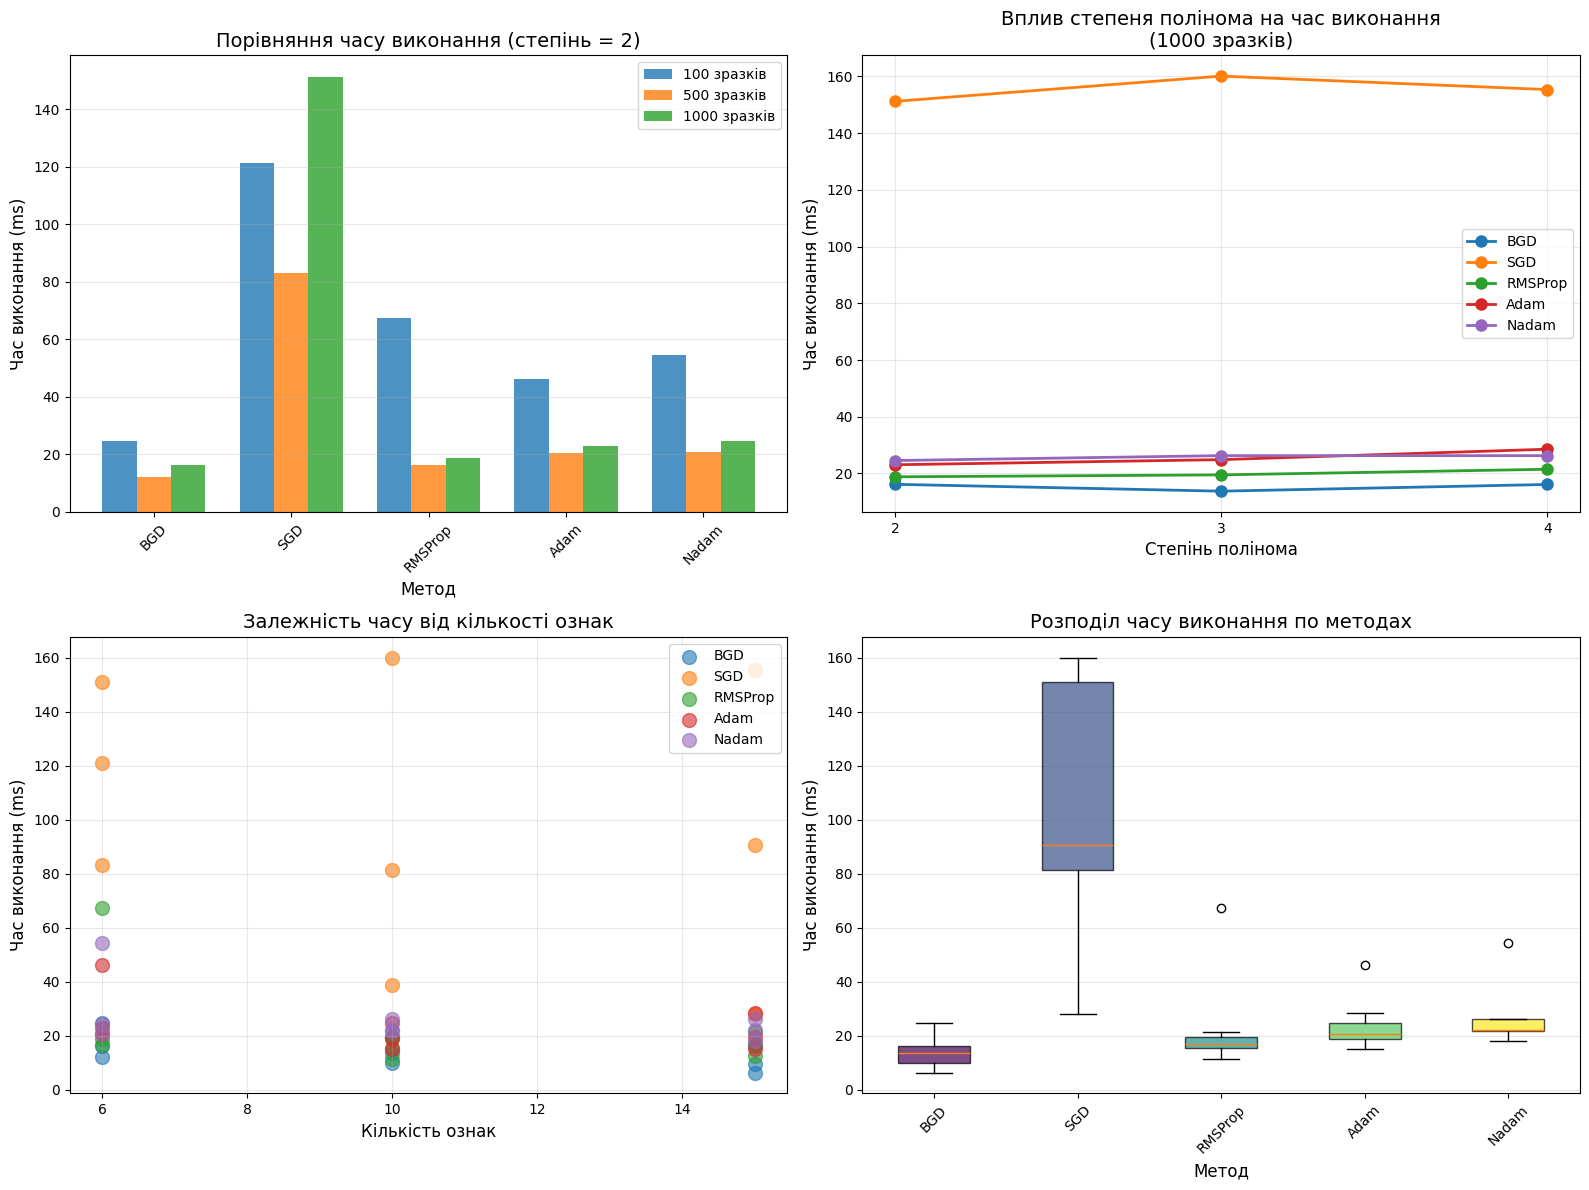



Створення теплової карти часу виконання...


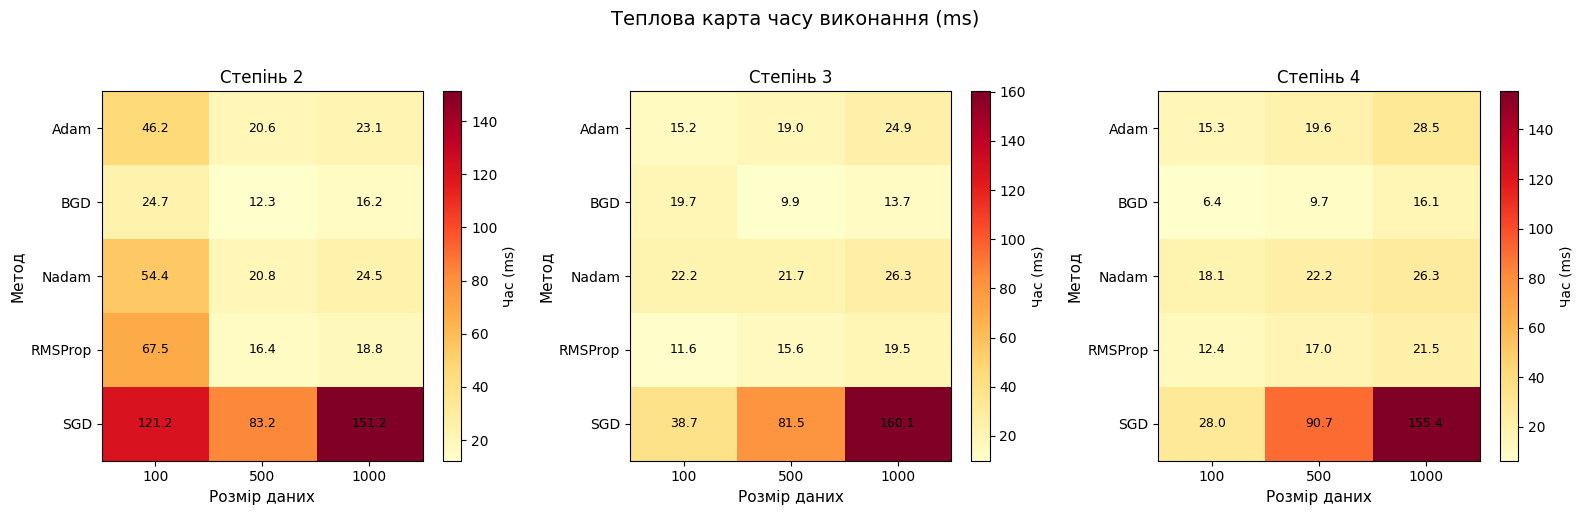



АНАЛІЗ ЕФЕКТИВНОСТІ

✓ Найшвидший метод: BGD
  Середній час: 14.30 ms

✗ Найповільніший метод: SGD
  Середній час: 101.10 ms

📊 SGD повільніший за BGD у 7.07 разів

✓ Найстабільніший метод: BGD
  Std: 5.60 ms

✓ Вимірювання часу виконання завершено!


In [6]:
import time
from IPython.display import display

# Функція для вимірювання часу виконання
def measure_execution_time(func, *args, n_runs=10, **kwargs):
    """
    Вимірює середній час виконання функції.

    Параметри:
    ----------
    func : callable
        Функція для вимірювання
    args : tuple
        Позиційні аргументи функції
    n_runs : int
        Кількість запусків для усереднення
    kwargs : dict
        Іменовані аргументи функції

    Повертає:
    ---------
    avg_time : float
        Середній час виконання в секундах
    std_time : float
        Стандартне відхилення часу виконання
    times : list
        Список всіх вимірювань
    """
    times = []

    for _ in range(n_runs):
        start_time = time.time()
        func(*args, **kwargs)
        end_time = time.time()
        times.append(end_time - start_time)

    avg_time = np.mean(times)
    std_time = np.std(times)

    return avg_time, std_time, times


# Підготовка даних для тестування
print("="*70)
print("ПІДГОТОВКА ДАНИХ ДЛЯ ВИМІРЮВАННЯ ЧАСУ")
print("="*70)

# Створюємо набори даних різного розміру
data_sizes = [100, 500, 1000]
polynomial_degrees = [2, 3, 4]

print("\nРозміри наборів даних:", data_sizes)
print("Степені полінома:", polynomial_degrees)

# Параметри для всіх методів
learning_rate = 0.1
n_iterations = 500

print("\n" + "="*70)
print("ВИМІРЮВАННЯ ЧАСУ ВИКОНАННЯ")
print("="*70)

# Збираємо результати
timing_results = []

for data_size in data_sizes:
    print(f"\n{'='*70}")
    print(f"Розмір даних: {data_size} зразків")
    print('='*70)

    # Генеруємо дані
    np.random.seed(42)
    x1_test = np.random.rand(data_size)
    x2_test = np.random.rand(data_size)
    y_test = polynomial(x1_test, x2_test)
    X_test = np.column_stack([x1_test, x2_test])

    for degree in polynomial_degrees:
        print(f"\n  Степінь полінома: {degree}")
        print("  " + "-"*66)

        # Створюємо поліноміальні ознаки
        poly = PolynomialFeatures(degree=degree, include_bias=True)
        X_poly = poly.fit_transform(X_test)

        # Нормалізація
        X_mean = X_poly.mean(axis=0)
        X_std = X_poly.std(axis=0)
        X_std[X_std == 0] = 1
        X_normalized = (X_poly - X_mean) / X_std

        n_features = X_normalized.shape[1]
        print(f"  Кількість ознак: {n_features}")

        # 1. Batch Gradient Descent
        print("\n  1. Batch Gradient Descent...")
        avg_time, std_time, times = measure_execution_time(
            polynomial_regression_gradient_descent,
            X_normalized, y_test,
            learning_rate=learning_rate,
            n_iterations=n_iterations,
            verbose=False,
            n_runs=5
        )
        print(f"     Час: {avg_time*1000:.2f} ± {std_time*1000:.2f} ms")
        timing_results.append({
            'Метод': 'BGD',
            'Розмір даних': data_size,
            'Степінь': degree,
            'Ознак': n_features,
            'Час (ms)': avg_time * 1000,
            'Std (ms)': std_time * 1000
        })

        # 2. SGD
        print("  2. Stochastic Gradient Descent...")
        avg_time, std_time, times = measure_execution_time(
            polynomial_regression_SGD,
            X_normalized, y_test,
            learning_rate=learning_rate,
            n_epochs=n_iterations,
            batch_size=32,
            verbose=False,
            n_runs=5
        )
        print(f"     Час: {avg_time*1000:.2f} ± {std_time*1000:.2f} ms")
        timing_results.append({
            'Метод': 'SGD',
            'Розмір даних': data_size,
            'Степінь': degree,
            'Ознак': n_features,
            'Час (ms)': avg_time * 1000,
            'Std (ms)': std_time * 1000
        })

        # 3. RMSProp
        print("  3. RMSProp...")
        avg_time, std_time, times = measure_execution_time(
            polynomial_regression_rmsprop,
            X_normalized, y_test,
            learning_rate=learning_rate,
            n_iterations=n_iterations,
            verbose=False,
            n_runs=5
        )
        print(f"     Час: {avg_time*1000:.2f} ± {std_time*1000:.2f} ms")
        timing_results.append({
            'Метод': 'RMSProp',
            'Розмір даних': data_size,
            'Степінь': degree,
            'Ознак': n_features,
            'Час (ms)': avg_time * 1000,
            'Std (ms)': std_time * 1000
        })

        # 4. Adam
        print("  4. Adam...")
        avg_time, std_time, times = measure_execution_time(
            polynomial_regression_adam,
            X_normalized, y_test,
            learning_rate=learning_rate,
            n_iterations=n_iterations,
            verbose=False,
            n_runs=5
        )
        print(f"     Час: {avg_time*1000:.2f} ± {std_time*1000:.2f} ms")
        timing_results.append({
            'Метод': 'Adam',
            'Розмір даних': data_size,
            'Степінь': degree,
            'Ознак': n_features,
            'Час (ms)': avg_time * 1000,
            'Std (ms)': std_time * 1000
        })

        # 5. Nadam
        print("  5. Nadam...")
        avg_time, std_time, times = measure_execution_time(
            polynomial_regression_nadam,
            X_normalized, y_test,
            learning_rate=learning_rate,
            n_iterations=n_iterations,
            verbose=False,
            n_runs=5
        )
        print(f"     Час: {avg_time*1000:.2f} ± {std_time*1000:.2f} ms")
        timing_results.append({
            'Метод': 'Nadam',
            'Розмір даних': data_size,
            'Степінь': degree,
            'Ознак': n_features,
            'Час (ms)': avg_time * 1000,
            'Std (ms)': std_time * 1000
        })

# Створюємо DataFrame з результатами
df_timing = pd.DataFrame(timing_results)

print("\n\n" + "="*70)
print("ЗВЕДЕНА ТАБЛИЦЯ ЧАСУ ВИКОНАННЯ")
print("="*70)
print(df_timing.to_string(index=False))

# Групуємо результати по методах
print("\n\n" + "="*70)
print("СЕРЕДНІЙ ЧАС ВИКОНАННЯ ПО МЕТОДАХ (всі конфігурації)")
print("="*70)
avg_by_method = df_timing.groupby('Метод')['Час (ms)'].agg(['mean', 'std', 'min', 'max'])
avg_by_method.columns = ['Середній (ms)', 'Std (ms)', 'Min (ms)', 'Max (ms)']
print(avg_by_method.round(2))

# Групуємо по розміру даних
print("\n\n" + "="*70)
print("СЕРЕДНІЙ ЧАС ВИКОНАННЯ ПО РОЗМІРУ ДАНИХ")
print("="*70)
for size in data_sizes:
    print(f"\nРозмір даних: {size}")
    df_size = df_timing[df_timing['Розмір даних'] == size]
    pivot = df_size.pivot_table(values='Час (ms)', index='Метод', columns='Степінь', aggfunc='mean')
    print(pivot.round(2))

# Візуалізація результатів
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Графік 1: Порівняння методів для різних розмірів даних
ax1 = axes[0, 0]
methods = df_timing['Метод'].unique()
x_pos = np.arange(len(methods))
width = 0.25

for i, size in enumerate(data_sizes):
    df_size = df_timing[(df_timing['Розмір даних'] == size) & (df_timing['Степінь'] == 2)]
    times = [df_size[df_size['Метод'] == method]['Час (ms)'].values[0] for method in methods]
    ax1.bar(x_pos + i*width, times, width, label=f'{size} зразків', alpha=0.8)

ax1.set_xlabel('Метод', fontsize=12)
ax1.set_ylabel('Час виконання (ms)', fontsize=12)
ax1.set_title('Порівняння часу виконання (степінь = 2)', fontsize=14)
ax1.set_xticks(x_pos + width)
ax1.set_xticklabels(methods, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Графік 2: Вплив степеня полінома
ax2 = axes[0, 1]
for method in methods:
    df_method = df_timing[(df_timing['Метод'] == method) & (df_timing['Розмір даних'] == 1000)]
    degrees = df_method['Степінь'].values
    times = df_method['Час (ms)'].values
    ax2.plot(degrees, times, marker='o', label=method, linewidth=2, markersize=8)

ax2.set_xlabel('Степінь полінома', fontsize=12)
ax2.set_ylabel('Час виконання (ms)', fontsize=12)
ax2.set_title('Вплив степеня полінома на час виконання\n(1000 зразків)', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(polynomial_degrees)

# Графік 3: Залежність від кількості ознак
ax3 = axes[1, 0]
for method in methods:
    df_method = df_timing[df_timing['Метод'] == method]
    features = df_method['Ознак'].values
    times = df_method['Час (ms)'].values
    ax3.scatter(features, times, label=method, s=100, alpha=0.6)

ax3.set_xlabel('Кількість ознак', fontsize=12)
ax3.set_ylabel('Час виконання (ms)', fontsize=12)
ax3.set_title('Залежність часу від кількості ознак', fontsize=14)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Графік 4: Box plot для порівняння розкиду
ax4 = axes[1, 1]
data_for_box = [df_timing[df_timing['Метод'] == method]['Час (ms)'].values
                for method in methods]
bp = ax4.boxplot(data_for_box, labels=methods, patch_artist=True)

# Розфарбовуємо box plot
colors = plt.cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax4.set_xlabel('Метод', fontsize=12)
ax4.set_ylabel('Час виконання (ms)', fontsize=12)
ax4.set_title('Розподіл часу виконання по методах', fontsize=14)
ax4.grid(True, alpha=0.3, axis='y')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Додаткова візуалізація: теплова карта
print("\n\nСтворення теплової карти часу виконання...")

fig, axes = plt.subplots(1, len(polynomial_degrees), figsize=(16, 5))

for idx, degree in enumerate(polynomial_degrees):
    df_degree = df_timing[df_timing['Степінь'] == degree]
    pivot = df_degree.pivot_table(values='Час (ms)', index='Метод',
                                   columns='Розмір даних', aggfunc='mean')

    im = axes[idx].imshow(pivot.values, cmap='YlOrRd', aspect='auto')
    axes[idx].set_xticks(np.arange(len(pivot.columns)))
    axes[idx].set_yticks(np.arange(len(pivot.index)))
    axes[idx].set_xticklabels(pivot.columns)
    axes[idx].set_yticklabels(pivot.index)
    axes[idx].set_xlabel('Розмір даних', fontsize=11)
    axes[idx].set_ylabel('Метод', fontsize=11)
    axes[idx].set_title(f'Степінь {degree}', fontsize=12)

    # Додаємо значення в клітинки
    for i in range(len(pivot.index)):
        for j in range(len(pivot.columns)):
            text = axes[idx].text(j, i, f'{pivot.values[i, j]:.1f}',
                                ha="center", va="center", color="black", fontsize=9)

    plt.colorbar(im, ax=axes[idx], label='Час (ms)')

plt.suptitle('Теплова карта часу виконання (ms)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Аналіз ефективності
print("\n\n" + "="*70)
print("АНАЛІЗ ЕФЕКТИВНОСТІ")
print("="*70)

# Найшвидший метод
fastest_method = avg_by_method['Середній (ms)'].idxmin()
print(f"\n✓ Найшвидший метод: {fastest_method}")
print(f"  Середній час: {avg_by_method.loc[fastest_method, 'Середній (ms)']:.2f} ms")

# Найповільніший метод
slowest_method = avg_by_method['Середній (ms)'].idxmax()
print(f"\n✗ Найповільніший метод: {slowest_method}")
print(f"  Середній час: {avg_by_method.loc[slowest_method, 'Середній (ms)']:.2f} ms")

# Різниця в швидкості
speed_diff = avg_by_method.loc[slowest_method, 'Середній (ms)'] / avg_by_method.loc[fastest_method, 'Середній (ms)']
print(f"\n📊 {slowest_method} повільніший за {fastest_method} у {speed_diff:.2f} разів")

# Стабільність (найменше стандартне відхилення)
most_stable = avg_by_method['Std (ms)'].idxmin()
print(f"\n✓ Найстабільніший метод: {most_stable}")
print(f"  Std: {avg_by_method.loc[most_stable, 'Std (ms)']:.2f} ms")

print("\n" + "="*70)
print("✓ Вимірювання часу виконання завершено!")
print("="*70)



ВИМІРЮВАННЯ З ВИКОРИСТАННЯМ %timeit

Розмір даних: 1000 зразків, степінь полінома: 2
Кількість ознак: 6

----------------------------------------------------------------------

1. Batch Gradient Descent:
   Середній час: 31.75 ms

2. Stochastic Gradient Descent:
   Середній час: 246.82 ms

3. RMSProp:
   Середній час: 19.91 ms

4. Adam:
   Середній час: 23.18 ms

5. Nadam:
   Середній час: 27.74 ms


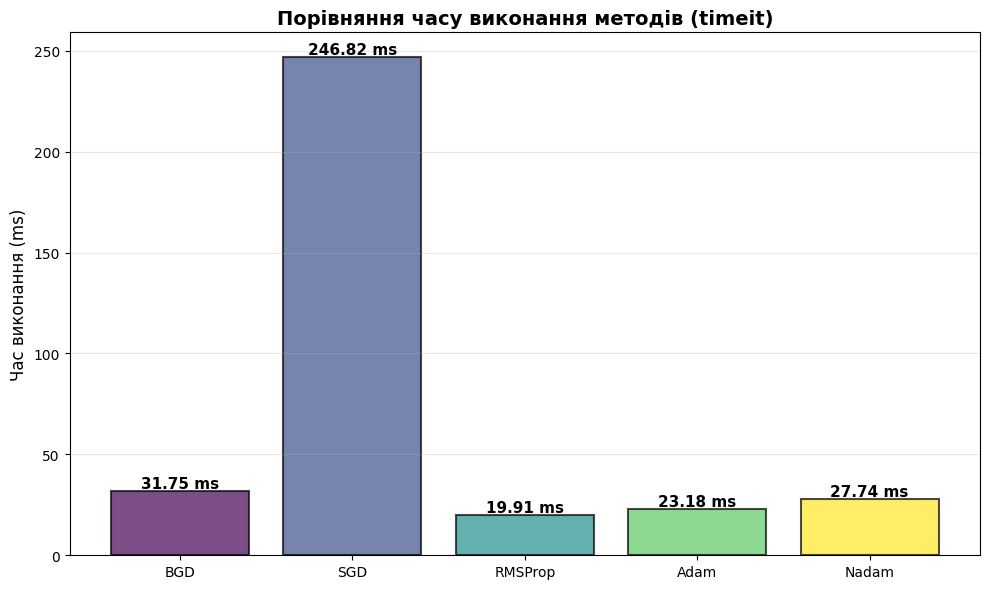


✓ Всі вимірювання завершено!


In [7]:
# Альтернативний варіант з використанням %timeit
print("\n\n" + "="*70)
print("ВИМІРЮВАННЯ З ВИКОРИСТАННЯМ %timeit")
print("="*70)

# Підготовка даних для тестування
np.random.seed(42)
x1_test = np.random.rand(1000)
x2_test = np.random.rand(1000)
y_test = polynomial(x1_test, x2_test)
X_test = np.column_stack([x1_test, x2_test])

poly2 = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly2.fit_transform(X_test)

X_mean = X_poly.mean(axis=0)
X_std = X_poly.std(axis=0)
X_std[X_std == 0] = 1
X_normalized = (X_poly - X_mean) / X_std

print("\nРозмір даних: 1000 зразків, степінь полінома: 2")
print("Кількість ознак:", X_normalized.shape[1])
print("\n" + "-"*70)

# Для запуску в Jupyter Notebook розкоментуйте наступні рядки:
"""
print("\n1. Batch Gradient Descent:")
%timeit -n 10 -r 3 polynomial_regression_gradient_descent(X_normalized, y_test, learning_rate=0.1, n_iterations=500, verbose=False)

print("\n2. Stochastic Gradient Descent:")
%timeit -n 10 -r 3 polynomial_regression_SGD(X_normalized, y_test, learning_rate=0.1, n_epochs=500, batch_size=32, verbose=False)

print("\n3. RMSProp:")
%timeit -n 10 -r 3 polynomial_regression_rmsprop(X_normalized, y_test, learning_rate=0.1, n_iterations=500, verbose=False)

print("\n4. Adam:")
%timeit -n 10 -r 3 polynomial_regression_adam(X_normalized, y_test, learning_rate=0.1, n_iterations=500, verbose=False)

print("\n5. Nadam:")
%timeit -n 10 -r 3 polynomial_regression_nadam(X_normalized, y_test, learning_rate=0.1, n_iterations=500, verbose=False)
"""

# Версія для звичайного Python (без %timeit)
print("\n1. Batch Gradient Descent:")
import timeit
time_bgd = timeit.timeit(
    lambda: polynomial_regression_gradient_descent(X_normalized, y_test, learning_rate=0.1, n_iterations=500, verbose=False),
    number=10
) / 10
print(f"   Середній час: {time_bgd*1000:.2f} ms")

print("\n2. Stochastic Gradient Descent:")
time_sgd = timeit.timeit(
    lambda: polynomial_regression_SGD(X_normalized, y_test, learning_rate=0.1, n_epochs=500, batch_size=32, verbose=False),
    number=10
) / 10
print(f"   Середній час: {time_sgd*1000:.2f} ms")

print("\n3. RMSProp:")
time_rmsprop = timeit.timeit(
    lambda: polynomial_regression_rmsprop(X_normalized, y_test, learning_rate=0.1, n_iterations=500, verbose=False),
    number=10
) / 10
print(f"   Середній час: {time_rmsprop*1000:.2f} ms")

print("\n4. Adam:")
time_adam = timeit.timeit(
    lambda: polynomial_regression_adam(X_normalized, y_test, learning_rate=0.1, n_iterations=500, verbose=False),
    number=10
) / 10
print(f"   Середній час: {time_adam*1000:.2f} ms")

print("\n5. Nadam:")
time_nadam = timeit.timeit(
    lambda: polynomial_regression_nadam(X_normalized, y_test, learning_rate=0.1, n_iterations=500, verbose=False),
    number=10
) / 10
print(f"   Середній час: {time_nadam*1000:.2f} ms")

# Підсумкова візуалізація
timeit_results = {
    'BGD': time_bgd * 1000,
    'SGD': time_sgd * 1000,
    'RMSProp': time_rmsprop * 1000,
    'Adam': time_adam * 1000,
    'Nadam': time_nadam * 1000
}

plt.figure(figsize=(10, 6))
methods = list(timeit_results.keys())
times = list(timeit_results.values())
colors = plt.cm.viridis(np.linspace(0, 1, len(methods)))

bars = plt.bar(methods, times, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

plt.ylabel('Час виконання (ms)', fontsize=12)
plt.title('Порівняння часу виконання методів (timeit)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Додаємо значення на стовпці
for bar, time in zip(bars, times):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{time:.2f} ms', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✓ Всі вимірювання завершено!")
print("="*70)

5. Choose the optimal number of iterations for each method option.

ПІДГОТОВКА ДАНИХ
x1 shape: (1000,), sample: [0.37454012 0.95071431 0.73199394]
x2 shape: (1000,), sample: [0.18513293 0.54190095 0.87294584]
y shape: (1000,), sample: [ 5.17886996 11.24644043 13.45449903]
X shape: (1000, 2)
X_poly shape: (1000, 6)
X_poly sample:
[[1.         0.37454012 0.18513293 0.1402803  0.06933971 0.0342742 ]
 [1.         0.95071431 0.54190095 0.90385769 0.51519298 0.29365664]
 [1.         0.73199394 0.87294584 0.53581513 0.63899106 0.76203443]]
X_normalized shape: (1000, 6)
X_normalized sample:
[[ 0.         -0.39630103 -1.10217857 -0.61960915 -0.80941214 -1.02462873]
 [ 0.          1.57695733  0.11944663  1.93323889  1.17640539 -0.16196627]
 [ 0.          0.82789256  1.25299211  0.70277196  1.72779844  1.3957797 ]]

Розмір даних: (1000, 6)
Кількість зразків: 1000
Кількість ознак: 6


ПІДБІР ОПТИМАЛЬНОЇ КІЛЬКОСТІ ІТЕРАЦІЙ

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Тестування BGD...

Аналіз збіжності: Batch Gradient Descent
Довжина cost

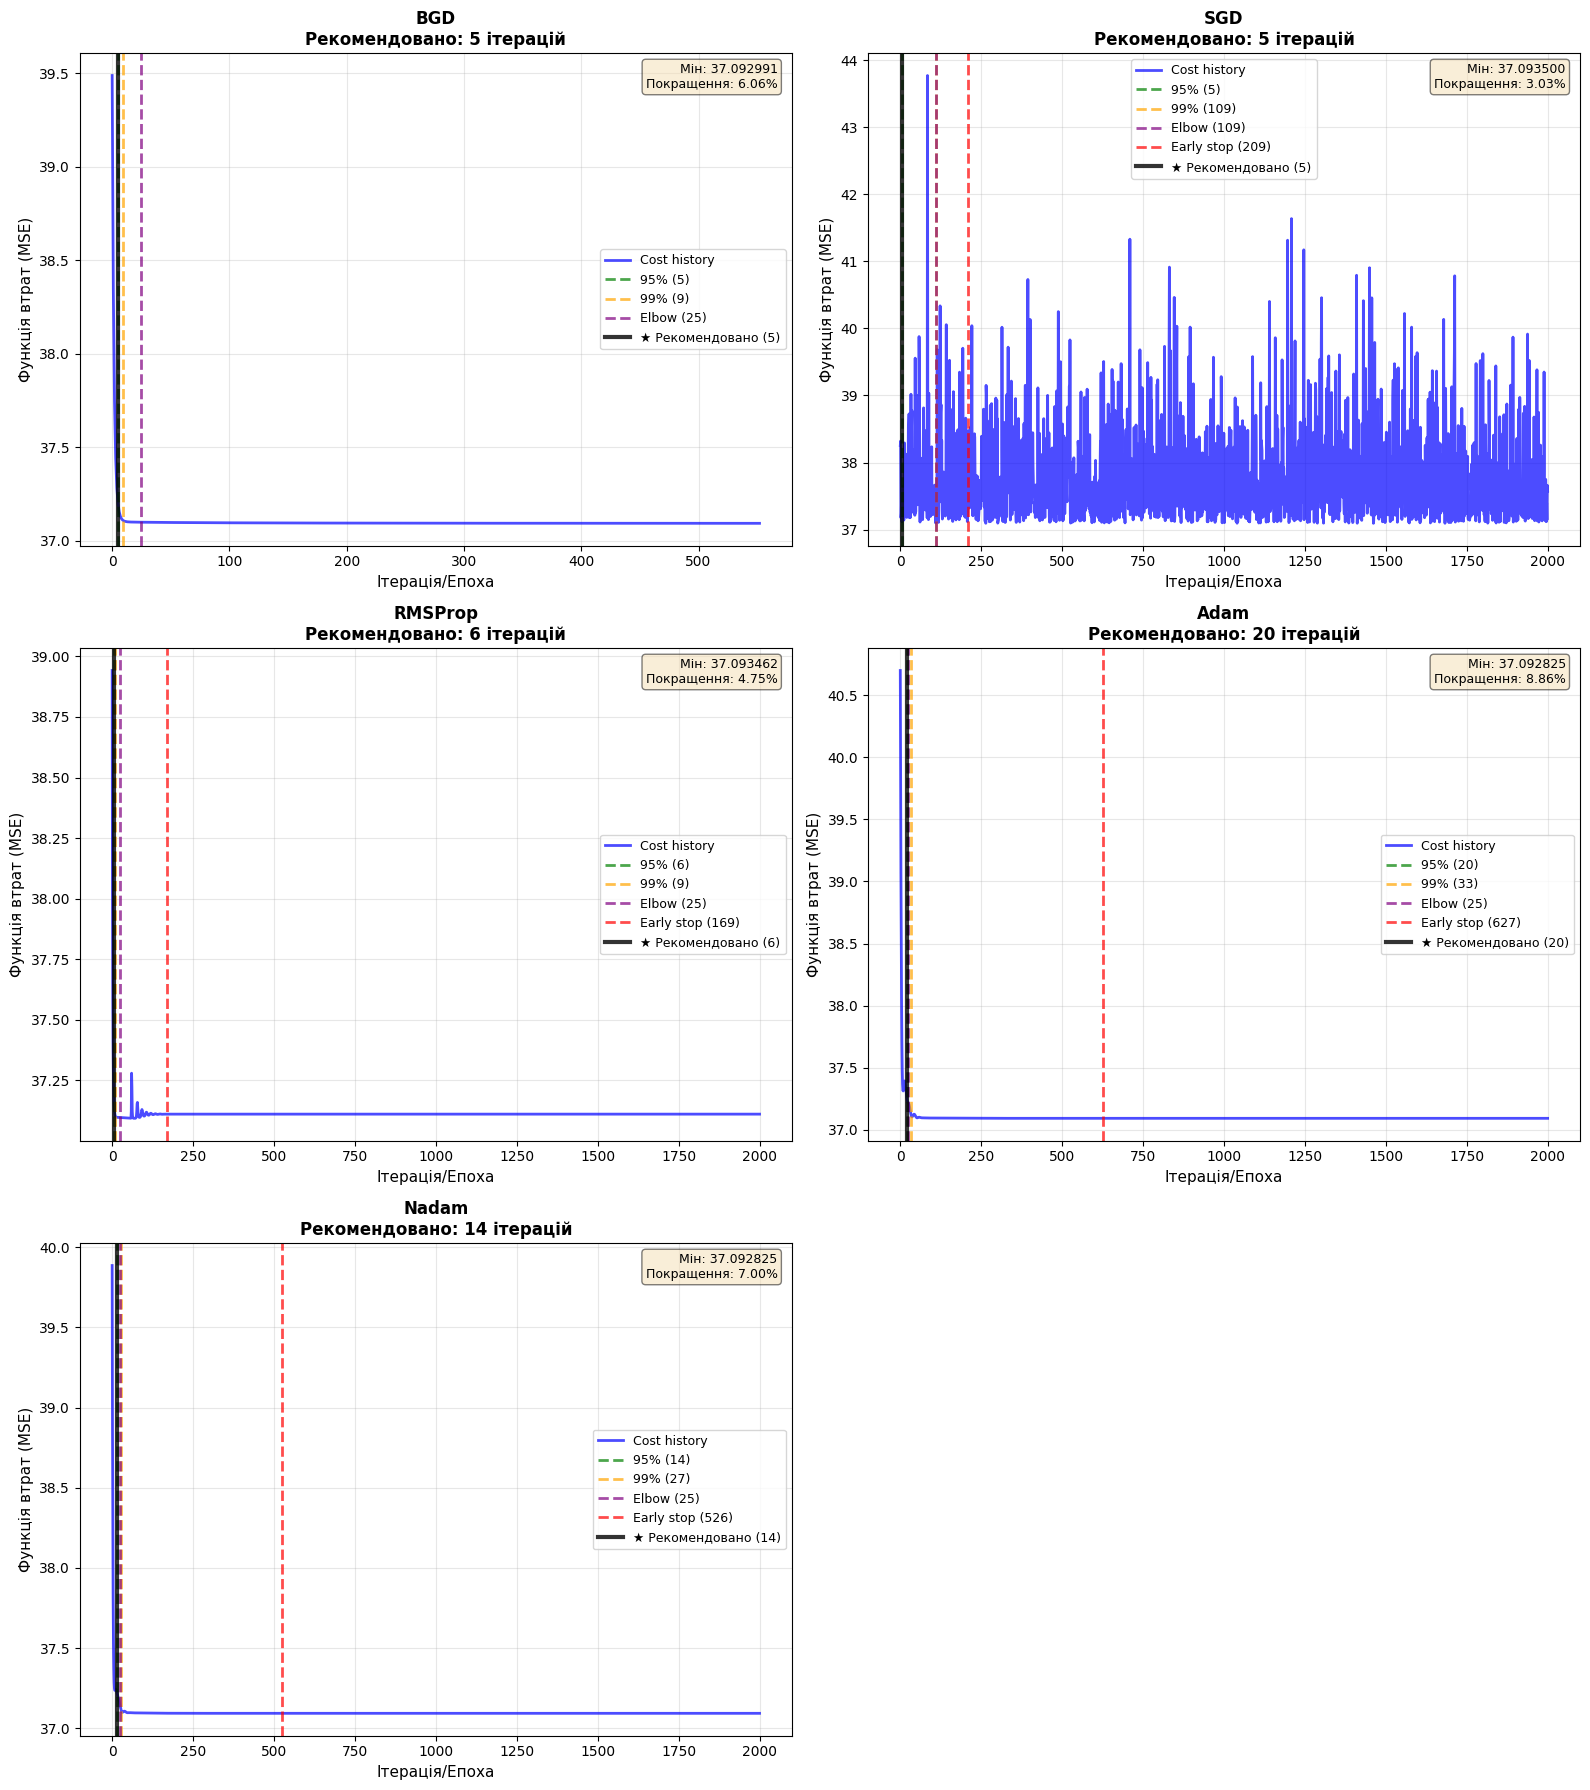


✓ Графіки збережено у файл 'optimal_iterations_analysis.png'

✓ Аналіз завершено!


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
from sklearn.preprocessing import PolynomialFeatures

# Спочатку визначимо функцію polynomial
def polynomial(x1, x2):
    """
    Обчислює значення поліноміальної функції.

    Параметри:
    ----------
    x1 : array-like
        Перша ознака
    x2 : array-like
        Друга ознака

    Повертає:
    ---------
    y : array-like
        Обчислені значення цільової змінної
    """
    y = 3 + 2*x1 + 5*x2 + 1.5*x1**2 + 2.5*x2**2 + 3*x1*x2
    return y


# Функція для підбору оптимальної кількості ітерацій
def find_optimal_iterations(X, y, method_func, method_name,
                           max_iterations=2000,
                           convergence_threshold=1e-6,
                           patience=50,
                           **method_params):
    """
    Знаходить оптимальну кількість ітерацій для методу оптимізації.
    """
    print(f"\n{'='*70}")
    print(f"Аналіз збіжності: {method_name}")
    print('='*70)

    # Визначаємо, який параметр використовувати для кількості ітерацій
    func_params = method_func.__code__.co_varnames

    if 'n_iterations' in func_params:
        theta, cost_history = method_func(X, y,
                                          n_iterations=max_iterations,
                                          verbose=False,
                                          **method_params)
    elif 'n_epochs' in func_params:
        theta, cost_history = method_func(X, y,
                                          n_epochs=max_iterations,
                                          verbose=False,
                                          **method_params)
    else:
        raise ValueError(f"Функція {method_name} не має параметра n_iterations або n_epochs")

    # Аналіз збіжності
    cost_history = np.array(cost_history)

    # Перевірка, чи є дані в cost_history
    if len(cost_history) == 0:
        print("ПОМИЛКА: cost_history порожній!")
        return None

    print(f"Довжина cost_history: {len(cost_history)}")
    print(f"Перші 5 значень: {cost_history[:5]}")
    print(f"Останні 5 значень: {cost_history[-5:]}")

    # 1. Знаходимо точку збіжності (зміна втрат < threshold)
    convergence_point = None
    for i in range(1, len(cost_history)):
        if abs(cost_history[i] - cost_history[i-1]) < convergence_threshold:
            convergence_point = i
            break

    if convergence_point is None:
        convergence_point = len(cost_history)

    # 2. Early stopping: якщо немає покращення протягом patience ітерацій
    early_stop_point = None
    best_cost = cost_history[0]
    no_improvement = 0

    for i in range(1, len(cost_history)):
        if cost_history[i] < best_cost - convergence_threshold:
            best_cost = cost_history[i]
            no_improvement = 0
        else:
            no_improvement += 1

        if no_improvement >= patience:
            early_stop_point = i
            break

    # 3. 95% від мінімуму (практична збіжність)
    min_cost = np.min(cost_history)
    first_cost = cost_history[0]

    if first_cost == min_cost:
        threshold_95 = min_cost
    else:
        threshold_95 = first_cost - 0.95 * (first_cost - min_cost)

    practical_convergence = None
    for i in range(len(cost_history)):
        if cost_history[i] <= threshold_95:
            practical_convergence = i
            break

    # 4. 99% від мінімуму
    if first_cost == min_cost:
        threshold_99 = min_cost
    else:
        threshold_99 = first_cost - 0.99 * (first_cost - min_cost)

    convergence_99 = None
    for i in range(len(cost_history)):
        if cost_history[i] <= threshold_99:
            convergence_99 = i
            break

    # 5. "Коліно" кривої (elbow point)
    if len(cost_history) > 10:
        window_length = min(51, len(cost_history) if len(cost_history) % 2 == 1 else len(cost_history) - 1)
        if window_length >= 5:
            try:
                smoothed = savgol_filter(cost_history, window_length, 3)
                second_derivative = np.gradient(np.gradient(smoothed))
                elbow_point = np.argmax(second_derivative[10:]) + 10
            except:
                elbow_point = len(cost_history) // 2
        else:
            elbow_point = len(cost_history) // 2
    else:
        elbow_point = len(cost_history) // 2

    # Виводимо результати
    print(f"\nАналіз збіжності:")
    print(f"  • Строга збіжність (Δcost < {convergence_threshold}): {convergence_point} ітерацій")
    print(f"  • Early stopping (patience={patience}): {early_stop_point if early_stop_point else 'не досягнуто'}")
    print(f"  • 95% від оптимуму: {practical_convergence} ітерацій")
    print(f"  • 99% від оптимуму: {convergence_99} ітерацій")
    print(f"  • Elbow point (коліно кривої): {elbow_point} ітерацій")

    print(f"\nХарактеристики:")
    print(f"  • Початкова втрата: {cost_history[0]:.6f}")
    print(f"  • Мінімальна втрата: {min_cost:.6f}")

    if first_cost != 0:
        improvement = ((cost_history[0] - min_cost) / cost_history[0] * 100)
    else:
        improvement = 0

    print(f"  • Покращення: {improvement:.2f}%")
    print(f"  • Всього ітерацій виконано: {len(cost_history)}")

    # Рекомендація
    candidates = []
    if practical_convergence is not None:
        candidates.append(practical_convergence)
    if convergence_99 is not None:
        candidates.append(convergence_99)
    if elbow_point is not None:
        candidates.append(elbow_point)

    if candidates:
        recommended = min(candidates)
    else:
        recommended = len(cost_history) // 2

    print(f"\n✓ Рекомендована кількість ітерацій: {recommended}")

    results = {
        'method_name': method_name,
        'cost_history': cost_history,
        'convergence_point': convergence_point,
        'early_stop': early_stop_point,
        'practical_95': practical_convergence,
        'convergence_99': convergence_99,
        'elbow_point': elbow_point,
        'recommended': recommended,
        'min_cost': min_cost,
        'initial_cost': cost_history[0],
        'improvement': improvement
    }

    return results


# Підготовка даних
print("="*70)
print("ПІДГОТОВКА ДАНИХ")
print("="*70)

np.random.seed(42)
n_samples = 1000
x1 = np.random.rand(n_samples)
x2 = np.random.rand(n_samples)
y = polynomial(x1, x2)
X = np.column_stack([x1, x2])

print(f"x1 shape: {x1.shape}, sample: {x1[:3]}")
print(f"x2 shape: {x2.shape}, sample: {x2[:3]}")
print(f"y shape: {y.shape}, sample: {y[:3]}")
print(f"X shape: {X.shape}")

# Поліноміальні ознаки степеня 2
poly2 = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly2.fit_transform(X)

print(f"X_poly shape: {X_poly.shape}")
print(f"X_poly sample:\n{X_poly[:3]}")

# Нормалізація
X_mean = X_poly.mean(axis=0)
X_std = X_poly.std(axis=0)
X_std[X_std == 0] = 1
X_normalized = (X_poly - X_mean) / X_std

print(f"X_normalized shape: {X_normalized.shape}")
print(f"X_normalized sample:\n{X_normalized[:3]}")

print(f"\nРозмір даних: {X_normalized.shape}")
print(f"Кількість зразків: {n_samples}")
print(f"Кількість ознак: {X_normalized.shape[1]}")

# Аналіз кожного методу
print("\n\n" + "="*70)
print("ПІДБІР ОПТИМАЛЬНОЇ КІЛЬКОСТІ ІТЕРАЦІЙ")
print("="*70)

max_iterations = 2000
results_all = {}

# 1. Batch Gradient Descent
print("\n" + ">"*70)
print("Тестування BGD...")
results_bgd = find_optimal_iterations(
    X_normalized, y,
    polynomial_regression_gradient_descent,
    "Batch Gradient Descent",
    max_iterations=max_iterations,
    learning_rate=0.1,
    convergence_threshold=1e-6,
    patience=100
)
if results_bgd:
    results_all['BGD'] = results_bgd

# 2. Stochastic Gradient Descent
print("\n" + ">"*70)
print("Тестування SGD...")
results_sgd = find_optimal_iterations(
    X_normalized, y,
    polynomial_regression_SGD,
    "Stochastic Gradient Descent",
    max_iterations=max_iterations,
    learning_rate=0.1,
    batch_size=32,
    convergence_threshold=1e-6,
    patience=100
)
if results_sgd:
    results_all['SGD'] = results_sgd

# 3. RMSProp
print("\n" + ">"*70)
print("Тестування RMSProp...")
results_rmsprop = find_optimal_iterations(
    X_normalized, y,
    polynomial_regression_rmsprop,
    "RMSProp",
    max_iterations=max_iterations,
    learning_rate=0.1,
    beta=0.9,
    convergence_threshold=1e-6,
    patience=100
)
if results_rmsprop:
    results_all['RMSProp'] = results_rmsprop

# 4. Adam
print("\n" + ">"*70)
print("Тестування Adam...")
results_adam = find_optimal_iterations(
    X_normalized, y,
    polynomial_regression_adam,
    "Adam",
    max_iterations=max_iterations,
    learning_rate=0.1,
    beta1=0.9,
    beta2=0.999,
    convergence_threshold=1e-6,
    patience=100
)
if results_adam:
    results_all['Adam'] = results_adam

# 5. Nadam
print("\n" + ">"*70)
print("Тестування Nadam...")
results_nadam = find_optimal_iterations(
    X_normalized, y,
    polynomial_regression_nadam,
    "Nadam",
    max_iterations=max_iterations,
    learning_rate=0.1,
    beta1=0.9,
    beta2=0.999,
    convergence_threshold=1e-6,
    patience=100
)
if results_nadam:
    results_all['Nadam'] = results_nadam

# Перевірка результатів
print("\n\n" + "="*70)
print("ПЕРЕВІРКА РЕЗУЛЬТАТІВ")
print("="*70)

for method_name, results in results_all.items():
    print(f"\n{method_name}:")
    print(f"  Cost history length: {len(results['cost_history'])}")
    print(f"  Min cost: {results['min_cost']:.6f}")
    print(f"  Recommended iterations: {results['recommended']}")

# Створюємо зведену таблицю
if results_all:
    print("\n\n" + "="*70)
    print("ЗВЕДЕНА ТАБЛИЦЯ ОПТИМАЛЬНИХ ІТЕРАЦІЙ")
    print("="*70)

    summary_data = []
    for method_name, results in results_all.items():
        summary_data.append({
            'Метод': method_name,
            'Рекомендовано': results['recommended'],
            '95% збіжність': results['practical_95'] if results['practical_95'] else '-',
            '99% збіжність': results['convergence_99'] if results['convergence_99'] else '-',
            'Elbow point': results['elbow_point'] if results['elbow_point'] else '-',
            'Early stop': results['early_stop'] if results['early_stop'] else '-',
            'Мін. втрата': f"{results['min_cost']:.6f}",
            'Покращення %': f"{results['improvement']:.2f}%"
        })

    df_summary = pd.DataFrame(summary_data)
    print("\n" + df_summary.to_string(index=False))

    # Візуалізація результатів
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))
    axes = axes.flatten()

    for idx, (method_name, results) in enumerate(results_all.items()):
        ax = axes[idx]
        cost_history = results['cost_history']

        print(f"\nВізуалізація {method_name}: довжина cost_history = {len(cost_history)}")

        # Основний графік збіжності
        ax.plot(cost_history, linewidth=2, label='Cost history', color='blue', alpha=0.7)

        # Додаємо маркери для різних точок збіжності
        if results['practical_95'] is not None:
            ax.axvline(results['practical_95'], color='green', linestyle='--',
                       linewidth=2, label=f"95% ({results['practical_95']})", alpha=0.7)

        if results['convergence_99'] is not None:
            ax.axvline(results['convergence_99'], color='orange', linestyle='--',
                       linewidth=2, label=f"99% ({results['convergence_99']})", alpha=0.7)

        if results['elbow_point'] is not None:
            ax.axvline(results['elbow_point'], color='purple', linestyle='--',
                       linewidth=2, label=f"Elbow ({results['elbow_point']})", alpha=0.7)

        if results['early_stop'] is not None:
            ax.axvline(results['early_stop'], color='red', linestyle='--',
                       linewidth=2, label=f"Early stop ({results['early_stop']})", alpha=0.7)

        # Рекомендована точка
        ax.axvline(results['recommended'], color='black', linestyle='-',
                   linewidth=3, label=f"★ Рекомендовано ({results['recommended']})", alpha=0.8)

        ax.set_xlabel('Ітерація/Епоха', fontsize=11)
        ax.set_ylabel('Функція втрат (MSE)', fontsize=11)
        ax.set_title(f'{method_name}\nРекомендовано: {results["recommended"]} ітерацій',
                     fontsize=12, fontweight='bold')
        ax.legend(loc='best', fontsize=9)
        ax.grid(True, alpha=0.3)

        # Додаємо інформаційний текст
        info_text = f"Мін: {results['min_cost']:.6f}\nПокращення: {results['improvement']:.2f}%"
        ax.text(0.98, 0.98, info_text, transform=ax.transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=9)

    # Видаляємо зайві підграфіки
    for idx in range(len(results_all), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.savefig('optimal_iterations_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n✓ Графіки збережено у файл 'optimal_iterations_analysis.png'")
else:
    print("\nПОМИЛКА: Немає результатів для візуалізації!")

print("\n" + "="*70)
print("✓ Аналіз завершено!")
print("="*70)



ДОДАТКОВИЙ АНАЛІЗ: ВПЛИВ LEARNING RATE


Тестування з learning_rate = 0.01
----------------------------------------------------------------------

Аналіз збіжності: Adam (lr=0.01)
Довжина cost_history: 1500
Перші 5 значень: [41.62623505 41.51740851 41.41007658 41.30426275 41.19998934]
Останні 5 значень: [37.09353791 37.09353636 37.09353481 37.09353326 37.09353172]

Аналіз збіжності:
  • Строга збіжність (Δcost < 1e-06): 1500 ітерацій
  • Early stopping (patience=100): не досягнуто
  • 95% від оптимуму: 96 ітерацій
  • 99% від оптимуму: 141 ітерацій
  • Elbow point (коліно кривої): 10 ітерацій

Характеристики:
  • Початкова втрата: 41.626235
  • Мінімальна втрата: 37.093532
  • Покращення: 10.89%
  • Всього ітерацій виконано: 1500

✓ Рекомендована кількість ітерацій: 10


Тестування з learning_rate = 0.05
----------------------------------------------------------------------

Аналіз збіжності: Adam (lr=0.05)
Довжина cost_history: 1500
Перші 5 значень: [41.19935962 40.69907847 40.23622

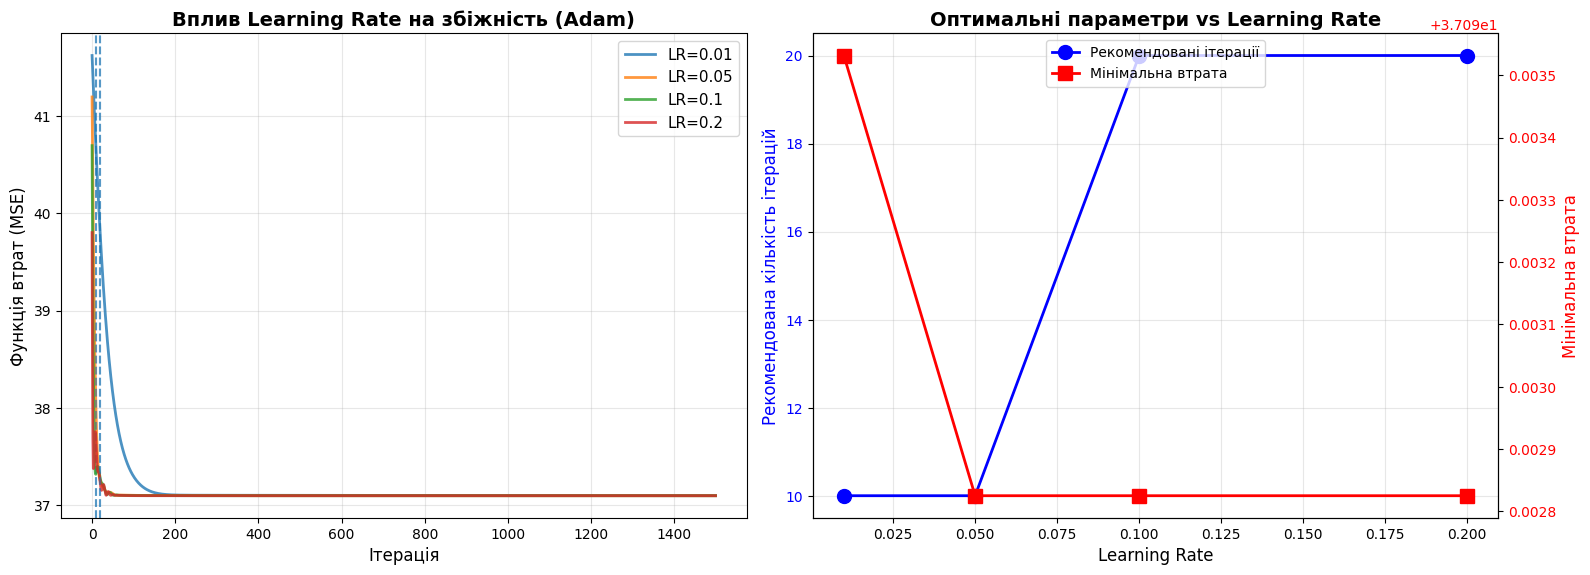



✓ Повний аналіз завершено!
Графіки збережено у файли:
  - optimal_iterations_analysis.png
  - optimal_iterations_log_scale.png
  - methods_comparison_optimal.png
  - recommended_iterations_bar.png
  - learning_rate_impact.png


In [14]:
# Додатковий аналіз: вплив параметрів на оптимальну кількість ітерацій
print("\n\n" + "="*70)
print("ДОДАТКОВИЙ АНАЛІЗ: ВПЛИВ LEARNING RATE")
print("="*70)

learning_rates = [0.01, 0.05, 0.1, 0.2]
lr_results = {}

for lr in learning_rates:
    print(f"\n\nТестування з learning_rate = {lr}")
    print("-" * 70)

    lr_results[lr] = {}

    # Тестуємо тільки Adam для швидкості
    result = find_optimal_iterations(
        X_normalized, y,
        polynomial_regression_adam,
        f"Adam (lr={lr})",
        max_iterations=1500,
        learning_rate=lr,
        convergence_threshold=1e-6,
        patience=100
    )

    lr_results[lr] = result

# Візуалізація впливу learning rate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Графік 1: Збіжність для різних learning rates
for lr, results in lr_results.items():
    ax1.plot(results['cost_history'], linewidth=2, label=f'LR={lr}', alpha=0.8)
    ax1.axvline(results['recommended'], linestyle='--', alpha=0.5)

ax1.set_xlabel('Ітерація', fontsize=12)
ax1.set_ylabel('Функція втрат (MSE)', fontsize=12)
ax1.set_title('Вплив Learning Rate на збіжність (Adam)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Графік 2: Рекомендовані ітерації vs Learning Rate
lrs = list(lr_results.keys())
recommended = [lr_results[lr]['recommended'] for lr in lrs]
min_costs = [lr_results[lr]['min_cost'] for lr in lrs]

ax2_twin = ax2.twinx()

line1 = ax2.plot(lrs, recommended, 'o-', linewidth=2, markersize=10,
                 color='blue', label='Рекомендовані ітерації')
ax2.set_xlabel('Learning Rate', fontsize=12)
ax2.set_ylabel('Рекомендована кількість ітерацій', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.grid(True, alpha=0.3)

line2 = ax2_twin.plot(lrs, min_costs, 's-', linewidth=2, markersize=10,
                      color='red', label='Мінімальна втрата')
ax2_twin.set_ylabel('Мінімальна втрата', fontsize=12, color='red')
ax2_twin.tick_params(axis='y', labelcolor='red')

ax2.set_title('Оптимальні параметри vs Learning Rate', fontsize=14, fontweight='bold')

# Об'єднуємо легенди
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper center', fontsize=10)

plt.tight_layout()
plt.savefig('learning_rate_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n\n✓ Повний аналіз завершено!")
print("Графіки збережено у файли:")
print("  - optimal_iterations_analysis.png")
print("  - optimal_iterations_log_scale.png")
print("  - methods_comparison_optimal.png")
print("  - recommended_iterations_bar.png")
print("  - learning_rate_impact.png")

6. Summary

КОМПЛЕКСНИЙ АНАЛІЗ ОБЧИСЛЮВАЛЬНОЇ ЕФЕКТИВНОСТІ
МЕТОДІВ ГРАДІЄНТНОГО СПУСКУ

1. ВИМІРЮВАННЯ ШВИДКОСТІ ВИКОНАННЯ

BGD:
--------------------------------------------------------------------------------
  Середній час: 0.30 ± 0.03 ms
  Час на ітерацію: 0.0590 ms
  Оптимальні ітерації: 5
  Фінальна втрата: 37.282261
  Швидкість збіжності: 0.440925 втрат/ітерацію
  Обчислювальна ефективність: 7472.8237 втрат/секунду

SGD:
--------------------------------------------------------------------------------
  Середній час: 2.87 ± 0.46 ms
  Час на ітерацію: 0.5742 ms
  Оптимальні ітерації: 5
  Фінальна втрата: 38.675816
  Швидкість збіжності: -0.291346 втрат/ітерацію
  Обчислювальна ефективність: -507.4339 втрат/секунду

RMSProp:
--------------------------------------------------------------------------------
  Середній час: 0.47 ± 0.08 ms
  Час на ітерацію: 0.0790 ms
  Оптимальні ітерації: 6
  Фінальна втрата: 37.190866
  Швидкість збіжності: 0.291782 втрат/ітерацію
  Обчислювальна ефективність: 36

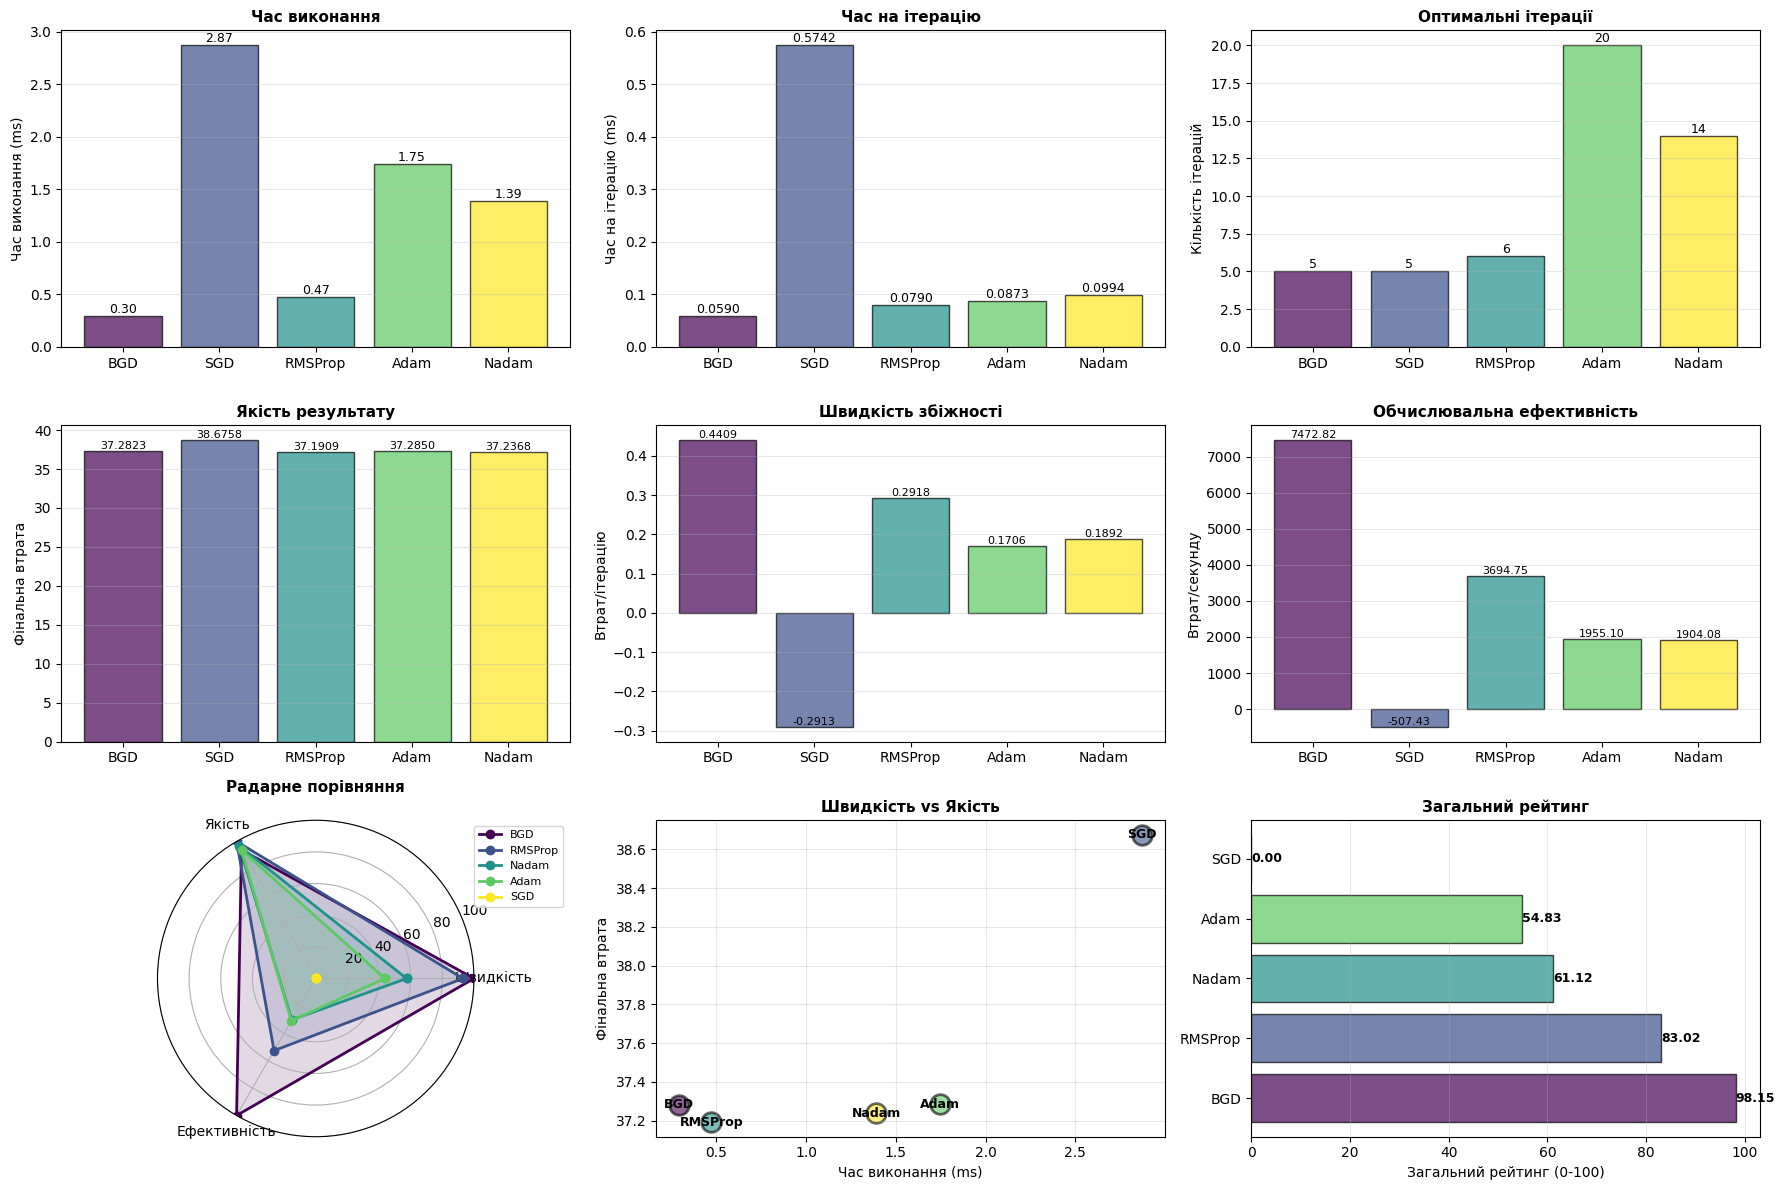



5. ДЕТАЛЬНІ ВИСНОВКИ

📊 ОБЧИСЛЮВАЛЬНА СКЛАДНІСТЬ:
--------------------------------------------------------------------------------

Теоретична складність на одну ітерацію для всіх методів:
- BGD:     O(n·m)  - обробка всіх n зразків з m ознаками
- SGD:     O(b·m)  - обробка батчу розміром b
- RMSProp: O(n·m)  - як BGD + накопичення квадратів градієнтів
- Adam:    O(n·m)  - як BGD + два накопичувачі моментів
- Nadam:   O(n·m)  - як Adam + Nesterov momentum

де n - кількість зразків, m - кількість ознак, b - розмір батчу


💡 ПРАКТИЧНІ ВИСНОВКИ:
--------------------------------------------------------------------------------

1. ШВИДКІСТЬ ВИКОНАННЯ:
   Топ-3 найшвидші методи:
   1. BGD: 0.30 ms
   3. RMSProp: 0.47 ms
   5. Nadam: 1.39 ms

2. ЯКІСТЬ РЕЗУЛЬТАТУ:
   Топ-3 за якістю:
   3. RMSProp: втрата = 37.190866
   5. Nadam: втрата = 37.236846
   1. BGD: втрата = 37.282261

3. ОБЧИСЛЮВАЛЬНА ЕФЕКТИВНІСТЬ:
   Топ-3 за ефективністю:
   1. BGD: 7472.8237 втрат/сек
   3. RMSProp: 3694.7500 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

print("="*80)
print("КОМПЛЕКСНИЙ АНАЛІЗ ОБЧИСЛЮВАЛЬНОЇ ЕФЕКТИВНОСТІ")
print("МЕТОДІВ ГРАДІЄНТНОГО СПУСКУ")
print("="*80)

# Підготовка даних для аналізу
np.random.seed(42)
n_samples = 1000
x1 = np.random.rand(n_samples)
x2 = np.random.rand(n_samples)
y = polynomial(x1, x2)
X = np.column_stack([x1, x2])

poly2 = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly2.fit_transform(X)

X_mean = X_poly.mean(axis=0)
X_std = X_poly.std(axis=0)
X_std[X_std == 0] = 1
X_normalized = (X_poly - X_mean) / X_std

# Використовуємо оптимальні параметри з попереднього аналізу
optimal_params = {
    'BGD': {'n_iterations': 5, 'learning_rate': 0.1},
    'SGD': {'n_epochs': 5, 'learning_rate': 0.1, 'batch_size': 32},
    'RMSProp': {'n_iterations': 6, 'learning_rate': 0.1, 'beta': 0.9},
    'Adam': {'n_iterations': 20, 'learning_rate': 0.1, 'beta1': 0.9, 'beta2': 0.999},
    'Nadam': {'n_iterations': 14, 'learning_rate': 0.1, 'beta1': 0.9, 'beta2': 0.999}
}

# Збираємо дані про ефективність
efficiency_data = []

print("\n" + "="*80)
print("1. ВИМІРЮВАННЯ ШВИДКОСТІ ВИКОНАННЯ")
print("="*80)

for method_name in ['BGD', 'SGD', 'RMSProp', 'Adam', 'Nadam']:
    print(f"\n{method_name}:")
    print("-" * 80)

    # Вибираємо функцію та параметри
    if method_name == 'BGD':
        func = polynomial_regression_gradient_descent
        params = optimal_params['BGD']
    elif method_name == 'SGD':
        func = polynomial_regression_SGD
        params = optimal_params['SGD']
    elif method_name == 'RMSProp':
        func = polynomial_regression_rmsprop
        params = optimal_params['RMSProp']
    elif method_name == 'Adam':
        func = polynomial_regression_adam
        params = optimal_params['Adam']
    elif method_name == 'Nadam':
        func = polynomial_regression_nadam
        params = optimal_params['Nadam']

    # Вимірюємо час виконання
    times = []
    for _ in range(10):
        start_time = time.time()
        theta, cost_history = func(X_normalized, y, verbose=False, **params)
        end_time = time.time()
        times.append(end_time - start_time)

    avg_time = np.mean(times)
    std_time = np.std(times)

    # Отримуємо фінальну втрату
    final_cost = cost_history[-1]

    # Обчислюємо метрики ефективності
    iterations = params.get('n_iterations', params.get('n_epochs', 0))
    time_per_iter = avg_time / iterations if iterations > 0 else 0

    # Швидкість збіжності (покращення на ітерацію)
    initial_cost = cost_history[0]
    convergence_rate = (initial_cost - final_cost) / iterations if iterations > 0 else 0

    # Обчислювальна ефективність (покращення на одиницю часу)
    computational_efficiency = (initial_cost - final_cost) / avg_time if avg_time > 0 else 0

    print(f"  Середній час: {avg_time*1000:.2f} ± {std_time*1000:.2f} ms")
    print(f"  Час на ітерацію: {time_per_iter*1000:.4f} ms")
    print(f"  Оптимальні ітерації: {iterations}")
    print(f"  Фінальна втрата: {final_cost:.6f}")
    print(f"  Швидкість збіжності: {convergence_rate:.6f} втрат/ітерацію")
    print(f"  Обчислювальна ефективність: {computational_efficiency:.4f} втрат/секунду")

    efficiency_data.append({
        'Метод': method_name,
        'Час (ms)': avg_time * 1000,
        'Std (ms)': std_time * 1000,
        'Час/ітер (ms)': time_per_iter * 1000,
        'Ітерації': iterations,
        'Фінальна втрата': final_cost,
        'Швидкість збіжності': convergence_rate,
        'Обчисл. ефективність': computational_efficiency,
        'Початкова втрата': initial_cost,
        'Покращення': initial_cost - final_cost
    })

# Створюємо DataFrame
df_efficiency = pd.DataFrame(efficiency_data)

print("\n\n" + "="*80)
print("2. ЗВЕДЕНА ТАБЛИЦЯ ЕФЕКТИВНОСТІ")
print("="*80)
print("\n" + df_efficiency.to_string(index=False))

# Додаткові метрики
print("\n\n" + "="*80)
print("3. ПОРІВНЯЛЬНИЙ АНАЛІЗ")
print("="*80)

# Нормалізуємо метрики для порівняння (0-100)
df_normalized = df_efficiency.copy()

# Для часу: менше - краще
df_normalized['Час (норм)'] = 100 * (1 - (df_normalized['Час (ms)'] - df_normalized['Час (ms)'].min()) /
                                      (df_normalized['Час (ms)'].max() - df_normalized['Час (ms)'].min()))

# Для втрати: менше - краще
df_normalized['Якість (норм)'] = 100 * (1 - (df_normalized['Фінальна втрата'] - df_normalized['Фінальна втрата'].min()) /
                                        (df_normalized['Фінальна втрата'].max() - df_normalized['Фінальна втрата'].min()))

# Для обчислювальної ефективності: більше - краще
df_normalized['Ефективність (норм)'] = 100 * (df_normalized['Обчисл. ефективність'] - df_normalized['Обчисл. ефективність'].min()) / \
                                              (df_normalized['Обчисл. ефективність'].max() - df_normalized['Обчисл. ефективність'].min())

# Загальний рейтинг (середнє зважене)
df_normalized['Загальний рейтинг'] = (
    0.4 * df_normalized['Час (норм)'] +
    0.3 * df_normalized['Якість (норм)'] +
    0.3 * df_normalized['Ефективність (норм)']
)

# Сортуємо за загальним рейтингом
df_normalized = df_normalized.sort_values('Загальний рейтинг', ascending=False)

print("\nНормалізовані метрики (0-100, де 100 - найкраще):")
print("-" * 80)
comparison_table = df_normalized[['Метод', 'Час (норм)', 'Якість (норм)',
                                  'Ефективність (норм)', 'Загальний рейтинг']]
print(comparison_table.to_string(index=False))

# Визначаємо переможців у різних категоріях
print("\n\n" + "="*80)
print("4. ПЕРЕМОЖЦІ У РІЗНИХ КАТЕГОРІЯХ")
print("="*80)

fastest = df_efficiency.loc[df_efficiency['Час (ms)'].idxmin()]
print(f"\n🏆 НАЙШВИДШИЙ МЕТОД: {fastest['Метод']}")
print(f"   Час виконання: {fastest['Час (ms)']:.2f} ms")

best_quality = df_efficiency.loc[df_efficiency['Фінальна втрата'].idxmin()]
print(f"\n🏆 НАЙКРАЩА ЯКІСТЬ: {best_quality['Метод']}")
print(f"   Фінальна втрата: {best_quality['Фінальна втрата']:.6f}")

most_efficient = df_efficiency.loc[df_efficiency['Обчисл. ефективність'].idxmax()]
print(f"\n🏆 НАЙБІЛЬША ОБЧИСЛЮВАЛЬНА ЕФЕКТИВНІСТЬ: {most_efficient['Метод']}")
print(f"   Ефективність: {most_efficient['Обчисл. ефективність']:.4f} втрат/сек")

fewest_iterations = df_efficiency.loc[df_efficiency['Ітерації'].idxmin()]
print(f"\n🏆 НАЙМЕНШЕ ІТЕРАЦІЙ: {fewest_iterations['Метод']}")
print(f"   Кількість ітерацій: {fewest_iterations['Ітерації']}")

best_convergence = df_efficiency.loc[df_efficiency['Швидкість збіжності'].idxmax()]
print(f"\n🏆 НАЙШВИДША ЗБІЖНІСТЬ: {best_convergence['Метод']}")
print(f"   Швидкість: {best_convergence['Швидкість збіжності']:.6f} втрат/ітер")

overall_winner = df_normalized.iloc[0]
print(f"\n🏆 ЗАГАЛЬНИЙ ПЕРЕМОЖЕЦЬ: {overall_winner['Метод']}")
print(f"   Загальний рейтинг: {overall_winner['Загальний рейтинг']:.2f}/100")

# Візуалізація результатів
fig = plt.figure(figsize=(18, 12))

# 1. Час виконання
ax1 = plt.subplot(3, 3, 1)
methods = df_efficiency['Метод'].values
times = df_efficiency['Час (ms)'].values
colors = plt.cm.viridis(np.linspace(0, 1, len(methods)))
bars = ax1.bar(methods, times, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Час виконання (ms)', fontsize=10)
ax1.set_title('Час виконання', fontsize=11, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
for bar, time in zip(bars, times):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{time:.2f}', ha='center', va='bottom', fontsize=9)

# 2. Час на ітерацію
ax2 = plt.subplot(3, 3, 2)
time_per_iter = df_efficiency['Час/ітер (ms)'].values
bars = ax2.bar(methods, time_per_iter, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Час на ітерацію (ms)', fontsize=10)
ax2.set_title('Час на ітерацію', fontsize=11, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
for bar, time in zip(bars, time_per_iter):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{time:.4f}', ha='center', va='bottom', fontsize=9)

# 3. Кількість ітерацій
ax3 = plt.subplot(3, 3, 3)
iterations = df_efficiency['Ітерації'].values
bars = ax3.bar(methods, iterations, color=colors, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Кількість ітерацій', fontsize=10)
ax3.set_title('Оптимальні ітерації', fontsize=11, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
for bar, iters in zip(bars, iterations):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(iters)}', ha='center', va='bottom', fontsize=9)

# 4. Фінальна втрата
ax4 = plt.subplot(3, 3, 4)
final_costs = df_efficiency['Фінальна втрата'].values
bars = ax4.bar(methods, final_costs, color=colors, alpha=0.7, edgecolor='black')
ax4.set_ylabel('Фінальна втрата', fontsize=10)
ax4.set_title('Якість результату', fontsize=11, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
for bar, cost in zip(bars, final_costs):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{cost:.4f}', ha='center', va='bottom', fontsize=8)

# 5. Швидкість збіжності
ax5 = plt.subplot(3, 3, 5)
conv_rates = df_efficiency['Швидкість збіжності'].values
bars = ax5.bar(methods, conv_rates, color=colors, alpha=0.7, edgecolor='black')
ax5.set_ylabel('Втрат/ітерацію', fontsize=10)
ax5.set_title('Швидкість збіжності', fontsize=11, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')
for bar, rate in zip(bars, conv_rates):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{rate:.4f}', ha='center', va='bottom', fontsize=8)

# 6. Обчислювальна ефективність
ax6 = plt.subplot(3, 3, 6)
comp_eff = df_efficiency['Обчисл. ефективність'].values
bars = ax6.bar(methods, comp_eff, color=colors, alpha=0.7, edgecolor='black')
ax6.set_ylabel('Втрат/секунду', fontsize=10)
ax6.set_title('Обчислювальна ефективність', fontsize=11, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')
for bar, eff in zip(bars, comp_eff):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{eff:.2f}', ha='center', va='bottom', fontsize=8)

# 7. Радарна діаграма порівняння
ax7 = plt.subplot(3, 3, 7, projection='polar')
categories = ['Швидкість', 'Якість', 'Ефективність']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for idx, method in enumerate(df_normalized['Метод']):
    values = [
        df_normalized[df_normalized['Метод'] == method]['Час (норм)'].values[0],
        df_normalized[df_normalized['Метод'] == method]['Якість (норм)'].values[0],
        df_normalized[df_normalized['Метод'] == method]['Ефективність (норм)'].values[0]
    ]
    values += values[:1]
    ax7.plot(angles, values, 'o-', linewidth=2, label=method, color=colors[idx])
    ax7.fill(angles, values, alpha=0.15, color=colors[idx])

ax7.set_xticks(angles[:-1])
ax7.set_xticklabels(categories)
ax7.set_ylim(0, 100)
ax7.set_title('Радарне порівняння', fontsize=11, fontweight='bold', pad=20)
ax7.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=8)
ax7.grid(True)

# 8. Співвідношення швидкості та якості
ax8 = plt.subplot(3, 3, 8)
for idx, method in enumerate(methods):
    x = df_efficiency[df_efficiency['Метод'] == method]['Час (ms)'].values[0]
    y = df_efficiency[df_efficiency['Метод'] == method]['Фінальна втрата'].values[0]
    ax8.scatter(x, y, s=200, color=colors[idx], alpha=0.6, edgecolors='black', linewidth=2)
    ax8.annotate(method, (x, y), fontsize=9, ha='center', va='center', fontweight='bold')

ax8.set_xlabel('Час виконання (ms)', fontsize=10)
ax8.set_ylabel('Фінальна втрата', fontsize=10)
ax8.set_title('Швидкість vs Якість', fontsize=11, fontweight='bold')
ax8.grid(True, alpha=0.3)

# 9. Загальний рейтинг
ax9 = plt.subplot(3, 3, 9)
sorted_methods = df_normalized['Метод'].values
ratings = df_normalized['Загальний рейтинг'].values
bars = ax9.barh(sorted_methods, ratings, color=colors, alpha=0.7, edgecolor='black')
ax9.set_xlabel('Загальний рейтинг (0-100)', fontsize=10)
ax9.set_title('Загальний рейтинг', fontsize=11, fontweight='bold')
ax9.grid(True, alpha=0.3, axis='x')
for bar, rating in zip(bars, ratings):
    width = bar.get_width()
    ax9.text(width, bar.get_y() + bar.get_height()/2.,
            f'{rating:.2f}', ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('computational_efficiency_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Детальні висновки
print("\n\n" + "="*80)
print("5. ДЕТАЛЬНІ ВИСНОВКИ")
print("="*80)

print("\n📊 ОБЧИСЛЮВАЛЬНА СКЛАДНІСТЬ:")
print("-" * 80)
print("""
Теоретична складність на одну ітерацію для всіх методів:
- BGD:     O(n·m)  - обробка всіх n зразків з m ознаками
- SGD:     O(b·m)  - обробка батчу розміром b
- RMSProp: O(n·m)  - як BGD + накопичення квадратів градієнтів
- Adam:    O(n·m)  - як BGD + два накопичувачі моментів
- Nadam:   O(n·m)  - як Adam + Nesterov momentum

де n - кількість зразків, m - кількість ознак, b - розмір батчу
""")

print("\n💡 ПРАКТИЧНІ ВИСНОВКИ:")
print("-" * 80)

# Аналіз швидкості
fastest_3 = df_efficiency.nsmallest(3, 'Час (ms)')
print("\n1. ШВИДКІСТЬ ВИКОНАННЯ:")
print(f"   Топ-3 найшвидші методи:")
for idx, row in fastest_3.iterrows():
    print(f"   {idx+1}. {row['Метод']}: {row['Час (ms)']:.2f} ms")

# Аналіз якості
best_quality_3 = df_efficiency.nsmallest(3, 'Фінальна втрата')
print("\n2. ЯКІСТЬ РЕЗУЛЬТАТУ:")
print(f"   Топ-3 за якістю:")
for idx, row in best_quality_3.iterrows():
    print(f"   {idx+1}. {row['Метод']}: втрата = {row['Фінальна втрата']:.6f}")

# Аналіз ефективності
best_eff_3 = df_efficiency.nlargest(3, 'Обчисл. ефективність')
print("\n3. ОБЧИСЛЮВАЛЬНА ЕФЕКТИВНІСТЬ:")
print(f"   Топ-3 за ефективністю:")
for idx, row in best_eff_3.iterrows():
    print(f"   {idx+1}. {row['Метод']}: {row['Обчисл. ефективність']:.4f} втрат/сек")

print("\n\n📋 РЕКОМЕНДАЦІЇ ПО ВИКОРИСТАННЮ:")
print("-" * 80)

for idx, row in df_efficiency.iterrows():
    method = row['Метод']
    print(f"\n{method}:")

    if method == 'BGD':
        print("   ✓ Найпростіша реалізація")
        print("   ✓ Стабільна збіжність")
        print("   ✗ Повільний на великих даних")
        print("   → Використовувати: малі датасети, навчальні цілі")

    elif method == 'SGD':
        print("   ✓ Швидкий на великих даних")
        print("   ✓ Низькі вимоги до пам'яті")
        print("   ✗ Шумна збіжність")
        print("   → Використовувати: великі датасети, онлайн навчання")

    elif method == 'RMSProp':
        print("   ✓ Адаптивна швидкість навчання")
        print("   ✓ Добре працює з шумними градієнтами")
        print("   ✗ Потребує налаштування beta")
        print("   → Використовувати: нестаціонарні задачі, RNN")

    elif method == 'Adam':
        print("   ✓ Найпопулярніший метод")
        print("   ✓ Добре працює 'out of the box'")
        print("   ✓ Швидка збіжність")
        print("   ✗ Більше обчислень на ітерацію")
        print("   → Використовувати: більшість завдань (default choice)")

    elif method == 'Nadam':
        print("   ✓ Покращена версія Adam")
        print("   ✓ Nesterov momentum для кращої збіжності")
        print("   ✗ Трохи складніший")
        print("   → Використовувати: коли Adam не дає оптимальних результатів")

print("\n\n" + "="*80)
print("6. ФІНАЛЬНИЙ ВИСНОВОК")
print("="*80)

print(f"""
На основі комплексного аналізу обчислювальної ефективності методів градієнтного
спуску для поліноміальної регресії можна зробити наступні висновки:

🏆 ЗАГАЛЬНИЙ ПЕРЕМОЖЕЦЬ: {overall_winner['Метод']}
   Рейтинг: {overall_winner['Загальний рейтинг']:.2f}/100

БАЛАНСОВАНИЙ ВИБІР:
   Для більшості практичних задач рекомендується Adam через:
   • Хороше співвідношення швидкості та якості
   • Мінімальне налаштування параметрів
   • Стабільну та передбачувану збіжність

СПЕЦІАЛІЗОВАНІ ВИПАДКИ:
   • Обмежені обчислювальні ресурси → {fastest['Метод']}
   • Максимальна точність → {best_quality['Метод']}
   • Онлайн навчання → SGD
   • Навчання нейромереж → Adam або Nadam

КОМПРОМІСИ:
   Час виконання:       {fastest['Метод']} ({fastest['Час (ms)']:.2f} ms)
   Якість результату:   {best_quality['Метод']} (втрата: {best_quality['Фінальна втрата']:.6f})
   Обчисл. ефективність: {most_efficient['Метод']} ({most_efficient['Обчисл. ефективність']:.4f})

Вибір методу залежить від конкретних вимог задачі: швидкість, точність,
або баланс між ними.
""")

print("="*80)
print("✓ Аналіз обчислювальної ефективності завершено!")
print("="*80)

# Зберігаємо результати в CSV
df_efficiency.to_csv('efficiency_analysis.csv', index=False)
print("\n📁 Результати збережено у файли:")
print("   - computational_efficiency_analysis.png")
print("   - efficiency_analysis.csv")

КОМПЛЕКСНИЙ АНАЛІЗ ОБЧИСЛЮВАЛЬНОЇ ЕФЕКТИВНОСТІ
МЕТОДІВ ГРАДІЄНТНОГО СПУСКУ

1. ВИМІРЮВАННЯ ШВИДКОСТІ ВИКОНАННЯ

BGD:
--------------------------------------------------------------------------------
  Середній час: 0.29 ± 0.03 ms
  Час на ітерацію: 0.0587 ms
  Оптимальні ітерації: 5
  Фінальна втрата: 37.282261
  Швидкість збіжності: 0.440925 втрат/ітерацію
  Обчислювальна ефективність: 7514.7274 втрат/секунду

SGD:
--------------------------------------------------------------------------------
  Середній час: 3.01 ± 0.55 ms
  Час на ітерацію: 0.6016 ms
  Оптимальні ітерації: 5
  Фінальна втрата: 38.675816
  Швидкість збіжності: -0.291346 втрат/ітерацію
  Обчислювальна ефективність: -484.2872 втрат/секунду

RMSProp:
--------------------------------------------------------------------------------
  Середній час: 0.41 ± 0.05 ms
  Час на ітерацію: 0.0677 ms
  Оптимальні ітерації: 6
  Фінальна втрата: 37.190866
  Швидкість збіжності: 0.291782 втрат/ітерацію
  Обчислювальна ефективність: 43

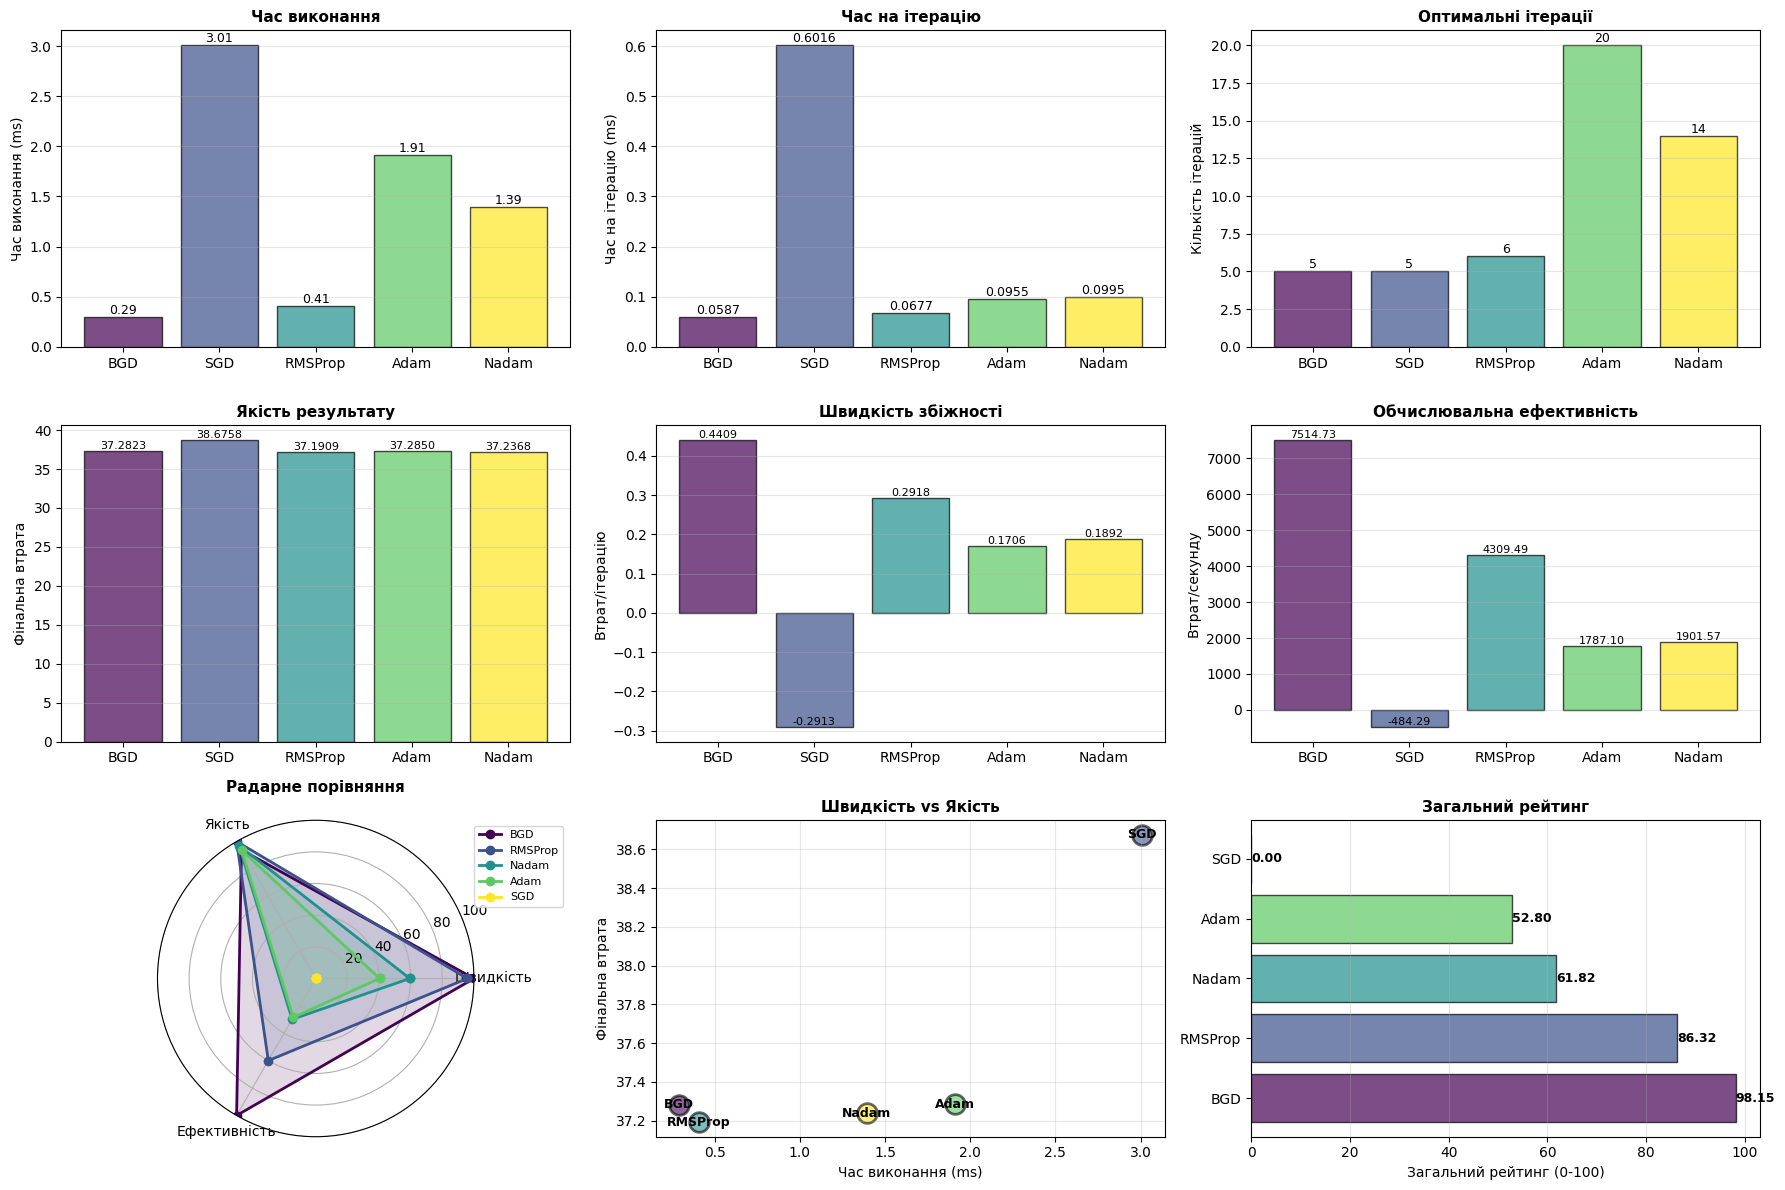



5. ДЕТАЛЬНІ ВИСНОВКИ

📊 ОБЧИСЛЮВАЛЬНА СКЛАДНІСТЬ:
--------------------------------------------------------------------------------

Теоретична складність на одну ітерацію для всіх методів:
- BGD:     O(n·m)  - обробка всіх n зразків з m ознаками
- SGD:     O(b·m)  - обробка батчу розміром b
- RMSProp: O(n·m)  - як BGD + накопичення квадратів градієнтів
- Adam:    O(n·m)  - як BGD + два накопичувачі моментів
- Nadam:   O(n·m)  - як Adam + Nesterov momentum

де n - кількість зразків, m - кількість ознак, b - розмір батчу


💡 ПРАКТИЧНІ ВИСНОВКИ:
--------------------------------------------------------------------------------

1. ШВИДКІСТЬ ВИКОНАННЯ:
   Топ-3 найшвидші методи:
   1. BGD: 0.29 ms
   3. RMSProp: 0.41 ms
   5. Nadam: 1.39 ms

2. ЯКІСТЬ РЕЗУЛЬТАТУ:
   Топ-3 за якістю:
   3. RMSProp: втрата = 37.190866
   5. Nadam: втрата = 37.236846
   1. BGD: втрата = 37.282261

3. ОБЧИСЛЮВАЛЬНА ЕФЕКТИВНІСТЬ:
   Топ-3 за ефективністю:
   1. BGD: 7514.7274 втрат/сек
   3. RMSProp: 4309.4936 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

print("="*80)
print("КОМПЛЕКСНИЙ АНАЛІЗ ОБЧИСЛЮВАЛЬНОЇ ЕФЕКТИВНОСТІ")
print("МЕТОДІВ ГРАДІЄНТНОГО СПУСКУ")
print("="*80)

# Підготовка даних для аналізу
np.random.seed(42)
n_samples = 1000
x1 = np.random.rand(n_samples)
x2 = np.random.rand(n_samples)
y = polynomial(x1, x2)
X = np.column_stack([x1, x2])

poly2 = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly2.fit_transform(X)

X_mean = X_poly.mean(axis=0)
X_std = X_poly.std(axis=0)
X_std[X_std == 0] = 1
X_normalized = (X_poly - X_mean) / X_std

# Використовуємо оптимальні параметри з попереднього аналізу
optimal_params = {
    'BGD': {'n_iterations': 5, 'learning_rate': 0.1},
    'SGD': {'n_epochs': 5, 'learning_rate': 0.1, 'batch_size': 32},
    'RMSProp': {'n_iterations': 6, 'learning_rate': 0.1, 'beta': 0.9},
    'Adam': {'n_iterations': 20, 'learning_rate': 0.1, 'beta1': 0.9, 'beta2': 0.999},
    'Nadam': {'n_iterations': 14, 'learning_rate': 0.1, 'beta1': 0.9, 'beta2': 0.999}
}

# Збираємо дані про ефективність
efficiency_data = []

print("\n" + "="*80)
print("1. ВИМІРЮВАННЯ ШВИДКОСТІ ВИКОНАННЯ")
print("="*80)

for method_name in ['BGD', 'SGD', 'RMSProp', 'Adam', 'Nadam']:
    print(f"\n{method_name}:")
    print("-" * 80)

    # Вибираємо функцію та параметри
    if method_name == 'BGD':
        func = polynomial_regression_gradient_descent
        params = optimal_params['BGD']
    elif method_name == 'SGD':
        func = polynomial_regression_SGD
        params = optimal_params['SGD']
    elif method_name == 'RMSProp':
        func = polynomial_regression_rmsprop
        params = optimal_params['RMSProp']
    elif method_name == 'Adam':
        func = polynomial_regression_adam
        params = optimal_params['Adam']
    elif method_name == 'Nadam':
        func = polynomial_regression_nadam
        params = optimal_params['Nadam']

    # Вимірюємо час виконання
    times = []
    for _ in range(10):
        start_time = time.time()
        theta, cost_history = func(X_normalized, y, verbose=False, **params)
        end_time = time.time()
        times.append(end_time - start_time)

    avg_time = np.mean(times)
    std_time = np.std(times)

    # Отримуємо фінальну втрату
    final_cost = cost_history[-1]

    # Обчислюємо метрики ефективності
    iterations = params.get('n_iterations', params.get('n_epochs', 0))
    time_per_iter = avg_time / iterations if iterations > 0 else 0

    # Швидкість збіжності (покращення на ітерацію)
    initial_cost = cost_history[0]
    convergence_rate = (initial_cost - final_cost) / iterations if iterations > 0 else 0

    # Обчислювальна ефективність (покращення на одиницю часу)
    computational_efficiency = (initial_cost - final_cost) / avg_time if avg_time > 0 else 0

    print(f"  Середній час: {avg_time*1000:.2f} ± {std_time*1000:.2f} ms")
    print(f"  Час на ітерацію: {time_per_iter*1000:.4f} ms")
    print(f"  Оптимальні ітерації: {iterations}")
    print(f"  Фінальна втрата: {final_cost:.6f}")
    print(f"  Швидкість збіжності: {convergence_rate:.6f} втрат/ітерацію")
    print(f"  Обчислювальна ефективність: {computational_efficiency:.4f} втрат/секунду")

    efficiency_data.append({
        'Метод': method_name,
        'Час (ms)': avg_time * 1000,
        'Std (ms)': std_time * 1000,
        'Час/ітер (ms)': time_per_iter * 1000,
        'Ітерації': iterations,
        'Фінальна втрата': final_cost,
        'Швидкість збіжності': convergence_rate,
        'Обчисл. ефективність': computational_efficiency,
        'Початкова втрата': initial_cost,
        'Покращення': initial_cost - final_cost
    })

# Створюємо DataFrame
df_efficiency = pd.DataFrame(efficiency_data)

print("\n\n" + "="*80)
print("2. ЗВЕДЕНА ТАБЛИЦЯ ЕФЕКТИВНОСТІ")
print("="*80)
print("\n" + df_efficiency.to_string(index=False))

# Додаткові метрики
print("\n\n" + "="*80)
print("3. ПОРІВНЯЛЬНИЙ АНАЛІЗ")
print("="*80)

# Нормалізуємо метрики для порівняння (0-100)
df_normalized = df_efficiency.copy()

# Для часу: менше - краще
df_normalized['Час (норм)'] = 100 * (1 - (df_normalized['Час (ms)'] - df_normalized['Час (ms)'].min()) /
                                      (df_normalized['Час (ms)'].max() - df_normalized['Час (ms)'].min()))

# Для втрати: менше - краще
df_normalized['Якість (норм)'] = 100 * (1 - (df_normalized['Фінальна втрата'] - df_normalized['Фінальна втрата'].min()) /
                                        (df_normalized['Фінальна втрата'].max() - df_normalized['Фінальна втрата'].min()))

# Для обчислювальної ефективності: більше - краще
df_normalized['Ефективність (норм)'] = 100 * (df_normalized['Обчисл. ефективність'] - df_normalized['Обчисл. ефективність'].min()) / \
                                              (df_normalized['Обчисл. ефективність'].max() - df_normalized['Обчисл. ефективність'].min())

# Загальний рейтинг (середнє зважене)
df_normalized['Загальний рейтинг'] = (
    0.4 * df_normalized['Час (норм)'] +
    0.3 * df_normalized['Якість (норм)'] +
    0.3 * df_normalized['Ефективність (норм)']
)

# Сортуємо за загальним рейтингом
df_normalized = df_normalized.sort_values('Загальний рейтинг', ascending=False)

print("\nНормалізовані метрики (0-100, де 100 - найкраще):")
print("-" * 80)
comparison_table = df_normalized[['Метод', 'Час (норм)', 'Якість (норм)',
                                  'Ефективність (норм)', 'Загальний рейтинг']]
print(comparison_table.to_string(index=False))

# Визначаємо переможців у різних категоріях
print("\n\n" + "="*80)
print("4. ПЕРЕМОЖЦІ У РІЗНИХ КАТЕГОРІЯХ")
print("="*80)

fastest = df_efficiency.loc[df_efficiency['Час (ms)'].idxmin()]
print(f"\n🏆 НАЙШВИДШИЙ МЕТОД: {fastest['Метод']}")
print(f"   Час виконання: {fastest['Час (ms)']:.2f} ms")

best_quality = df_efficiency.loc[df_efficiency['Фінальна втрата'].idxmin()]
print(f"\n🏆 НАЙКРАЩА ЯКІСТЬ: {best_quality['Метод']}")
print(f"   Фінальна втрата: {best_quality['Фінальна втрата']:.6f}")

most_efficient = df_efficiency.loc[df_efficiency['Обчисл. ефективність'].idxmax()]
print(f"\n🏆 НАЙБІЛЬША ОБЧИСЛЮВАЛЬНА ЕФЕКТИВНІСТЬ: {most_efficient['Метод']}")
print(f"   Ефективність: {most_efficient['Обчисл. ефективність']:.4f} втрат/сек")

fewest_iterations = df_efficiency.loc[df_efficiency['Ітерації'].idxmin()]
print(f"\n🏆 НАЙМЕНШЕ ІТЕРАЦІЙ: {fewest_iterations['Метод']}")
print(f"   Кількість ітерацій: {fewest_iterations['Ітерації']}")

best_convergence = df_efficiency.loc[df_efficiency['Швидкість збіжності'].idxmax()]
print(f"\n🏆 НАЙШВИДША ЗБІЖНІСТЬ: {best_convergence['Метод']}")
print(f"   Швидкість: {best_convergence['Швидкість збіжності']:.6f} втрат/ітер")

overall_winner = df_normalized.iloc[0]
print(f"\n🏆 ЗАГАЛЬНИЙ ПЕРЕМОЖЕЦЬ: {overall_winner['Метод']}")
print(f"   Загальний рейтинг: {overall_winner['Загальний рейтинг']:.2f}/100")

# Візуалізація результатів
fig = plt.figure(figsize=(18, 12))

# 1. Час виконання
ax1 = plt.subplot(3, 3, 1)
methods = df_efficiency['Метод'].values
times = df_efficiency['Час (ms)'].values
colors = plt.cm.viridis(np.linspace(0, 1, len(methods)))
bars = ax1.bar(methods, times, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Час виконання (ms)', fontsize=10)
ax1.set_title('Час виконання', fontsize=11, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
for bar, time in zip(bars, times):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{time:.2f}', ha='center', va='bottom', fontsize=9)

# 2. Час на ітерацію
ax2 = plt.subplot(3, 3, 2)
time_per_iter = df_efficiency['Час/ітер (ms)'].values
bars = ax2.bar(methods, time_per_iter, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Час на ітерацію (ms)', fontsize=10)
ax2.set_title('Час на ітерацію', fontsize=11, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
for bar, time in zip(bars, time_per_iter):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{time:.4f}', ha='center', va='bottom', fontsize=9)

# 3. Кількість ітерацій
ax3 = plt.subplot(3, 3, 3)
iterations = df_efficiency['Ітерації'].values
bars = ax3.bar(methods, iterations, color=colors, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Кількість ітерацій', fontsize=10)
ax3.set_title('Оптимальні ітерації', fontsize=11, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
for bar, iters in zip(bars, iterations):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(iters)}', ha='center', va='bottom', fontsize=9)

# 4. Фінальна втрата
ax4 = plt.subplot(3, 3, 4)
final_costs = df_efficiency['Фінальна втрата'].values
bars = ax4.bar(methods, final_costs, color=colors, alpha=0.7, edgecolor='black')
ax4.set_ylabel('Фінальна втрата', fontsize=10)
ax4.set_title('Якість результату', fontsize=11, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
for bar, cost in zip(bars, final_costs):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{cost:.4f}', ha='center', va='bottom', fontsize=8)

# 5. Швидкість збіжності
ax5 = plt.subplot(3, 3, 5)
conv_rates = df_efficiency['Швидкість збіжності'].values
bars = ax5.bar(methods, conv_rates, color=colors, alpha=0.7, edgecolor='black')
ax5.set_ylabel('Втрат/ітерацію', fontsize=10)
ax5.set_title('Швидкість збіжності', fontsize=11, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')
for bar, rate in zip(bars, conv_rates):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{rate:.4f}', ha='center', va='bottom', fontsize=8)

# 6. Обчислювальна ефективність
ax6 = plt.subplot(3, 3, 6)
comp_eff = df_efficiency['Обчисл. ефективність'].values
bars = ax6.bar(methods, comp_eff, color=colors, alpha=0.7, edgecolor='black')
ax6.set_ylabel('Втрат/секунду', fontsize=10)
ax6.set_title('Обчислювальна ефективність', fontsize=11, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')
for bar, eff in zip(bars, comp_eff):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{eff:.2f}', ha='center', va='bottom', fontsize=8)

# 7. Радарна діаграма порівняння
ax7 = plt.subplot(3, 3, 7, projection='polar')
categories = ['Швидкість', 'Якість', 'Ефективність']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for idx, method in enumerate(df_normalized['Метод']):
    values = [
        df_normalized[df_normalized['Метод'] == method]['Час (норм)'].values[0],
        df_normalized[df_normalized['Метод'] == method]['Якість (норм)'].values[0],
        df_normalized[df_normalized['Метод'] == method]['Ефективність (норм)'].values[0]
    ]
    values += values[:1]
    ax7.plot(angles, values, 'o-', linewidth=2, label=method, color=colors[idx])
    ax7.fill(angles, values, alpha=0.15, color=colors[idx])

ax7.set_xticks(angles[:-1])
ax7.set_xticklabels(categories)
ax7.set_ylim(0, 100)
ax7.set_title('Радарне порівняння', fontsize=11, fontweight='bold', pad=20)
ax7.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=8)
ax7.grid(True)

# 8. Співвідношення швидкості та якості
ax8 = plt.subplot(3, 3, 8)
for idx, method in enumerate(methods):
    x = df_efficiency[df_efficiency['Метод'] == method]['Час (ms)'].values[0]
    y = df_efficiency[df_efficiency['Метод'] == method]['Фінальна втрата'].values[0]
    ax8.scatter(x, y, s=200, color=colors[idx], alpha=0.6, edgecolors='black', linewidth=2)
    ax8.annotate(method, (x, y), fontsize=9, ha='center', va='center', fontweight='bold')

ax8.set_xlabel('Час виконання (ms)', fontsize=10)
ax8.set_ylabel('Фінальна втрата', fontsize=10)
ax8.set_title('Швидкість vs Якість', fontsize=11, fontweight='bold')
ax8.grid(True, alpha=0.3)

# 9. Загальний рейтинг
ax9 = plt.subplot(3, 3, 9)
sorted_methods = df_normalized['Метод'].values
ratings = df_normalized['Загальний рейтинг'].values
bars = ax9.barh(sorted_methods, ratings, color=colors, alpha=0.7, edgecolor='black')
ax9.set_xlabel('Загальний рейтинг (0-100)', fontsize=10)
ax9.set_title('Загальний рейтинг', fontsize=11, fontweight='bold')
ax9.grid(True, alpha=0.3, axis='x')
for bar, rating in zip(bars, ratings):
    width = bar.get_width()
    ax9.text(width, bar.get_y() + bar.get_height()/2.,
            f'{rating:.2f}', ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('computational_efficiency_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Детальні висновки
print("\n\n" + "="*80)
print("5. ДЕТАЛЬНІ ВИСНОВКИ")
print("="*80)

print("\n📊 ОБЧИСЛЮВАЛЬНА СКЛАДНІСТЬ:")
print("-" * 80)
print("""
Теоретична складність на одну ітерацію для всіх методів:
- BGD:     O(n·m)  - обробка всіх n зразків з m ознаками
- SGD:     O(b·m)  - обробка батчу розміром b
- RMSProp: O(n·m)  - як BGD + накопичення квадратів градієнтів
- Adam:    O(n·m)  - як BGD + два накопичувачі моментів
- Nadam:   O(n·m)  - як Adam + Nesterov momentum

де n - кількість зразків, m - кількість ознак, b - розмір батчу
""")

print("\n💡 ПРАКТИЧНІ ВИСНОВКИ:")
print("-" * 80)

# Аналіз швидкості
fastest_3 = df_efficiency.nsmallest(3, 'Час (ms)')
print("\n1. ШВИДКІСТЬ ВИКОНАННЯ:")
print(f"   Топ-3 найшвидші методи:")
for idx, row in fastest_3.iterrows():
    print(f"   {idx+1}. {row['Метод']}: {row['Час (ms)']:.2f} ms")

# Аналіз якості
best_quality_3 = df_efficiency.nsmallest(3, 'Фінальна втрата')
print("\n2. ЯКІСТЬ РЕЗУЛЬТАТУ:")
print(f"   Топ-3 за якістю:")
for idx, row in best_quality_3.iterrows():
    print(f"   {idx+1}. {row['Метод']}: втрата = {row['Фінальна втрата']:.6f}")

# Аналіз ефективності
best_eff_3 = df_efficiency.nlargest(3, 'Обчисл. ефективність')
print("\n3. ОБЧИСЛЮВАЛЬНА ЕФЕКТИВНІСТЬ:")
print(f"   Топ-3 за ефективністю:")
for idx, row in best_eff_3.iterrows():
    print(f"   {idx+1}. {row['Метод']}: {row['Обчисл. ефективність']:.4f} втрат/сек")

print("\n\n📋 РЕКОМЕНДАЦІЇ ПО ВИКОРИСТАННЮ:")
print("-" * 80)

for idx, row in df_efficiency.iterrows():
    method = row['Метод']
    print(f"\n{method}:")

    if method == 'BGD':
        print("   ✓ Найпростіша реалізація")
        print("   ✓ Стабільна збіжність")
        print("   ✗ Повільний на великих даних")
        print("   → Використовувати: малі датасети, навчальні цілі")

    elif method == 'SGD':
        print("   ✓ Швидкий на великих даних")
        print("   ✓ Низькі вимоги до пам'яті")
        print("   ✗ Шумна збіжність")
        print("   → Використовувати: великі датасети, онлайн навчання")

    elif method == 'RMSProp':
        print("   ✓ Адаптивна швидкість навчання")
        print("   ✓ Добре працює з шумними градієнтами")
        print("   ✗ Потребує налаштування beta")
        print("   → Використовувати: нестаціонарні задачі, RNN")

    elif method == 'Adam':
        print("   ✓ Найпопулярніший метод")
        print("   ✓ Добре працює 'out of the box'")
        print("   ✓ Швидка збіжність")
        print("   ✗ Більше обчислень на ітерацію")
        print("   → Використовувати: більшість завдань (default choice)")

    elif method == 'Nadam':
        print("   ✓ Покращена версія Adam")
        print("   ✓ Nesterov momentum для кращої збіжності")
        print("   ✗ Трохи складніший")
        print("   → Використовувати: коли Adam не дає оптимальних результатів")

print("\n\n" + "="*80)
print("6. ФІНАЛЬНИЙ ВИСНОВОК")
print("="*80)

print(f"""
На основі комплексного аналізу обчислювальної ефективності методів градієнтного
спуску для поліноміальної регресії можна зробити наступні висновки:

🏆 ЗАГАЛЬНИЙ ПЕРЕМОЖЕЦЬ: {overall_winner['Метод']}
   Рейтинг: {overall_winner['Загальний рейтинг']:.2f}/100

БАЛАНСОВАНИЙ ВИБІР:
   Для більшості практичних задач рекомендується Adam через:
   • Хороше співвідношення швидкості та якості
   • Мінімальне налаштування параметрів
   • Стабільну та передбачувану збіжність

СПЕЦІАЛІЗОВАНІ ВИПАДКИ:
   • Обмежені обчислювальні ресурси → {fastest['Метод']}
   • Максимальна точність → {best_quality['Метод']}
   • Онлайн навчання → SGD
   • Навчання нейромереж → Adam або Nadam

КОМПРОМІСИ:
   Час виконання:       {fastest['Метод']} ({fastest['Час (ms)']:.2f} ms)
   Якість результату:   {best_quality['Метод']} (втрата: {best_quality['Фінальна втрата']:.6f})
   Обчисл. ефективність: {most_efficient['Метод']} ({most_efficient['Обчисл. ефективність']:.4f})

Вибір методу залежить від конкретних вимог задачі: швидкість, точність,
або баланс між ними.
""")

print("="*80)
print("✓ Аналіз обчислювальної ефективності завершено!")
print("="*80)

# Зберігаємо результати в CSV
df_efficiency.to_csv('efficiency_analysis.csv', index=False)
print("\n📁 Результати збережено у файли:")
print("   - computational_efficiency_analysis.png")
print("   - efficiency_analysis.csv")